<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

# Proyecto de Análisis de Popularidad de TED Talks
## Aplicación de Técnicas de NLP y Machine Learning

### Descripción del Proyecto
Este proyecto tiene como objetivo analizar el dataset de TED Talks para determinar los factores que hacen que un video sea popular. Se aplicarán técnicas de procesamiento de lenguaje natural (NLP), extracción de información y modelos de machine learning para clasificar la popularidad de las charlas.

### Objetivos Principales
- Limpiar y preparar el dataset de manera profesional
- Aplicar técnicas de NLP incluyendo análisis de entidades nombradas (NER)
- Entrenar múltiples modelos de machine learning
- Evaluar el rendimiento con métricas como F1-score (objetivo > 78%)
- Comparar modelos y proporcionar conclusiones

### Estructura del Análisis
1. **Configuración del Ambiente**
2. **Exploración y Limpieza de Datos**
3. **Procesamiento de Lenguaje Natural**
4. **Modelado y Evaluación**
5. **Conclusiones y Recomendaciones**

</div>

<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 1. Requisitos y Dependencias del Proyecto

### Librerías Principales
- **pandas**: Manipulación y análisis de datos
- **numpy**: Operaciones numéricas y arrays
- **scikit-learn**: Algoritmos de machine learning y métricas
- **matplotlib & seaborn**: Visualización de datos
- **plotly**: Gráficos interactivos

### Librerías de NLP
- **nltk**: Natural Language Toolkit para procesamiento básico de texto
- **spacy**: Análisis de entidades nombradas (NER) y procesamiento avanzado
- **transformers**: Modelos de Hugging Face (DistilBERT, RoBERTa)
- **torch**: Framework de deep learning para transformers
- **textblob**: Análisis de sentimientos y procesamiento de texto

### Librerías Adicionales
- **wordcloud**: Generación de nubes de palabras
- **datasets**: Manejo de datasets para modelos de transformers
- **accelerate**: Optimización para entrenamiento de modelos

</div>

<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 2. Instalación y Configuración del Ambiente

En esta sección se instalarán todas las dependencias necesarias y se configurarán los modelos de NLP. La celda siguiente se encarga de:

1. **Instalar todas las librerías requeridas**
2. **Descargar modelos de NLP necesarios** (spaCy, NLTK)
3. **Configurar el entorno de trabajo**
4. **Verificar la disponibilidad de GPU** (si está disponible)

### Nota Importante
Esta celda puede tardar varios minutos en ejecutarse la primera vez, ya que descarga modelos pre-entrenados. Las ejecuciones posteriores serán más rápidas gracias al sistema de caché.

</div>

In [1]:
# Instalación y configuración del ambiente
import subprocess
import sys
import os
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

def install_package(package):
    """Instala un paquete usando pip si no está disponible"""
    try:
        __import__(package.split('==')[0].split('[')[0])
        print(f"✓ {package} ya está instalado")
    except ImportError:
        print(f"Instalando {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✓ {package} instalado correctamente")

# Lista de paquetes requeridos
required_packages = [
    "pandas>=1.3.0",
    "numpy>=1.21.0", 
    "scikit-learn>=1.0.0",
    "matplotlib>=3.4.0",
    "seaborn>=0.11.0",
    "plotly>=5.0.0",
    "nltk>=3.7",
    "spacy>=3.4.0",
    "transformers>=4.20.0",
    "torch>=1.12.0",
    "datasets>=2.0.0",
    "accelerate>=0.20.0",
    "textblob>=0.17.0",
    "wordcloud>=1.8.0",
    "tqdm>=4.64.0"
]

print("=== CONFIGURACIÓN DEL AMBIENTE ===")
print("Instalando paquetes necesarios...")

# Instalar paquetes
for package in tqdm(required_packages, desc="Instalando paquetes"):
    install_package(package)

print("\n=== DESCARGANDO MODELOS DE NLP ===")

# Descargar datos de NLTK
try:
    import nltk
    nltk_data = ['punkt', 'stopwords', 'vader_lexicon', 'wordnet', 'omw-1.4']
    for data in tqdm(nltk_data, desc="Descargando datos NLTK"):
        nltk.download(data, quiet=True)
    print("✓ Datos NLTK descargados")
except Exception as e:
    print(f"Error descargando NLTK: {e}")

# Descargar modelo de spaCy para inglés
try:
    subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    print("✓ Modelo spaCy en_core_web_sm descargado")
except Exception as e:
    print(f"Error descargando spaCy: {e}")

# Verificar y precargar modelos transformer
print("\n=== PRECARGANDO MODELOS TRANSFORMER ===")
try:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    
    # Lista de modelos a precargar
    transformer_models = [
        "distilbert-base-uncased",
        "roberta-base", 
        "distilbert-base-uncased-finetuned-sst-2-english"
    ]
    
    for model_name in transformer_models:
        try:
            print(f"Precargando {model_name}...")
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            model = AutoModelForSequenceClassification.from_pretrained(model_name)
            print(f"✓ {model_name} descargado y cacheado")
        except Exception as e:
            print(f"⚠ Error con {model_name}: {e}")
    
    print("✓ Modelos transformer listos")
    
except Exception as e:
    print(f"⚠ Error configurando transformers: {e}")

# Verificar disponibilidad de GPU
try:
    import torch
    if torch.cuda.is_available():
        print(f"✓ GPU disponible: {torch.cuda.get_device_name(0)}")
        device = "cuda"
    else:
        print("✓ Usando CPU (GPU no disponible)")
        device = "cpu"
except:
    device = "cpu"
    print("✓ Usando CPU")

print("\n=== CONFIGURACIÓN COMPLETADA ===")
print("Todas las dependencias están listas para usar")
print(f"Dispositivo de cómputo: {device}")
print(f"Modelos transformer disponibles en caché")

=== CONFIGURACIÓN DEL AMBIENTE ===
Instalando paquetes necesarios...


Instalando paquetes:   0%|          | 0/15 [00:00<?, ?it/s]

Instalando pandas>=1.3.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ pandas>=1.3.0 instalado correctamente
Instalando numpy>=1.21.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ numpy>=1.21.0 instalado correctamente
Instalando scikit-learn>=1.0.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ scikit-learn>=1.0.0 instalado correctamente
Instalando matplotlib>=3.4.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ matplotlib>=3.4.0 instalado correctamente
Instalando seaborn>=0.11.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ seaborn>=0.11.0 instalado correctamente
Instalando plotly>=5.0.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ plotly>=5.0.0 instalado correctamente
Instalando nltk>=3.7...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ nltk>=3.7 instalado correctamente
Instalando spacy>=3.4.0...
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.8.2 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.22.4; python_version < "3.11", but you have numpy 2.2.6 which is incompatible.
scikit-learn 1.3.2 requires numpy<2.0,>=1.17.3, but you have numpy 2.2.6 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.6 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ spacy>=3.4.0 instalado correctamente
Instalando transformers>=4.20.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ transformers>=4.20.0 instalado correctamente
Instalando torch>=1.12.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ torch>=1.12.0 instalado correctamente
Instalando datasets>=2.0.0...
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ datasets>=2.0.0 instalado correctamente
Instalando accelerate>=0.20.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ accelerate>=0.20.0 instalado correctamente
Instalando textblob>=0.17.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ textblob>=0.17.0 instalado correctamente
Instalando wordcloud>=1.8.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ wordcloud>=1.8.0 instalado correctamente
Instalando tqdm>=4.64.0...



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✓ tqdm>=4.64.0 instalado correctamente

=== DESCARGANDO MODELOS DE NLP ===


Descargando datos NLTK:   0%|          | 0/5 [00:00<?, ?it/s]

✓ Datos NLTK descargados
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 119.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
✓ Modelo spaCy en_core_web_sm descargado

=== PRECARGANDO MODELOS TRANSFORMER ===
Precargando distilbert-base-uncased...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ distilbert-base-uncased descargado y cacheado
Precargando roberta-base...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ roberta-base descargado y cacheado
Precargando distilbert-base-uncased-finetuned-sst-2-english...
✓ distilbert-base-uncased-finetuned-sst-2-english descargado y cacheado
✓ Modelos transformer listos
✓ GPU disponible: Tesla T4

=== CONFIGURACIÓN COMPLETADA ===
Todas las dependencias están listas para usar
Dispositivo de cómputo: cuda
Modelos transformer disponibles en caché


<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 3. Importación de Librerías

En esta sección se importan todas las librerías necesarias para el análisis. Se organizan por categorías para mejor comprensión:

### Categorías de Librerías:
- **Manipulación de datos**: pandas, numpy
- **Visualización**: matplotlib, seaborn, plotly, wordcloud
- **Machine Learning**: scikit-learn, transformers, torch
- **NLP**: nltk, spacy, textblob
- **Utilidades**: os, re, json, warnings, tqdm

</div>

In [2]:
# === IMPORTACIÓN DE LIBRERÍAS ===

# Manipulación de datos
import pandas as pd
import numpy as np
import json
import re
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, 
                           f1_score, accuracy_score, precision_score, 
                           recall_score, roc_auc_score, roc_curve)

# NLP básico
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# spaCy
try:
    import spacy
    nlp = spacy.load("en_core_web_sm")
    print("✓ spaCy cargado correctamente")
except Exception as e:
    print(f"⚠ Error cargando spaCy: {e}")
    nlp = None

# Hugging Face Transformers
try:
    from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                             Trainer, TrainingArguments, DataCollatorWithPadding,
                             pipeline)
    from datasets import Dataset
    import torch
    print("✓ Transformers importados correctamente")
    
    # Verificar dispositivo
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"✓ Dispositivo: {device}")
    
except Exception as e:
    print(f"⚠ Error importando transformers: {e}")

# Utilidades
from tqdm.auto import tqdm
import time
from datetime import datetime

# Configuración de estilo para gráficos
plt.style.use('default')
sns.set_palette("husl")

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✓ Librerías principales importadas")

# Configurar stop words
try:
    stop_words = set(stopwords.words('english'))
    print("✓ Stop words de NLTK configuradas")
except:
    print("⚠ Error configurando stop words. Verifica la instalación de NLTK.")
    stop_words = set()

# Verificar versiones importantes
try:
    import sklearn
    import transformers
    print(f"✓ Pandas version: {pd.__version__}")
    print(f"✓ Scikit-learn version: {sklearn.__version__}")
    print(f"✓ Transformers version: {transformers.__version__}")
    print(f"✓ Torch version: {torch.__version__}")
except Exception as e:
    print(f"⚠ Error verificando versiones: {e}")

print("\n✓ TODAS LAS LIBRERÍAS LISTAS PARA USAR")

✓ spaCy cargado correctamente
✓ Transformers importados correctamente
✓ Dispositivo: cuda
✓ Librerías principales importadas
✓ Stop words de NLTK configuradas
✓ Pandas version: 2.1.4
✓ Scikit-learn version: 1.3.2
✓ Transformers version: 4.54.1
✓ Torch version: 2.7.1+cu128

✓ TODAS LAS LIBRERÍAS LISTAS PARA USAR


In [3]:
# === DESCARGA Y VERIFICACIÓN DE MODELOS TRANSFORMER ===

def download_and_verify_transformers():
    """
    Descarga y verifica que los modelos transformer estén disponibles
    """
    print("=== DESCARGANDO MODELOS TRANSFORMER ===")
    
    # Modelos que vamos a usar
    models_to_download = {
        "distilbert-base-uncased": "DistilBERT para clasificación general",
        "roberta-base": "RoBERTa para mejor rendimiento",
        "distilbert-base-uncased-finetuned-sst-2-english": "DistilBERT para análisis de sentimientos"
    }
    
    downloaded_models = {}
    
    for model_name, description in models_to_download.items():
        print(f"\nDescargando {model_name}...")
        print(f"Descripción: {description}")
        
        try:
            # Descargar tokenizer y modelo
            print("  - Descargando tokenizer...")
            tokenizer = AutoTokenizer.from_pretrained(model_name)
            
            print("  - Descargando modelo...")
            model = AutoModelForSequenceClassification.from_pretrained(model_name)
            
            # Verificar que funciona
            print("  - Verificando funcionamiento...")
            test_text = "This is a test sentence."
            inputs = tokenizer(test_text, return_tensors="pt", truncation=True, padding=True)
            
            with torch.no_grad():
                outputs = model(**inputs)
            
            downloaded_models[model_name] = {
                'tokenizer': tokenizer,
                'model': model,
                'status': 'success'
            }
            
            print(f"  ✓ {model_name} descargado y verificado correctamente")
            
        except Exception as e:
            print(f"  ⚠ Error con {model_name}: {e}")
            downloaded_models[model_name] = {
                'status': 'error',
                'error': str(e)
            }
    
    # Resumen
    successful_downloads = sum(1 for model_info in downloaded_models.values() 
                              if model_info['status'] == 'success')
    
    print(f"\n=== RESUMEN DE DESCARGA ===")
    print(f"Modelos descargados exitosamente: {successful_downloads}/{len(models_to_download)}")
    
    for model_name, model_info in downloaded_models.items():
        status_icon = "✓" if model_info['status'] == 'success' else "✗"
        print(f"  {status_icon} {model_name}")
    
    if successful_downloads > 0:
        print(f"\n✓ Al menos {successful_downloads} modelo(s) transformer disponible(s)")
        
        # Crear pipeline de ejemplo
        if 'distilbert-base-uncased-finetuned-sst-2-english' in downloaded_models:
            if downloaded_models['distilbert-base-uncased-finetuned-sst-2-english']['status'] == 'success':
                print("\nCreando pipeline de análisis de sentimientos...")
                try:
                    sentiment_pipeline = pipeline(
                        "sentiment-analysis",
                        model="distilbert-base-uncased-finetuned-sst-2-english",
                        return_all_scores=True
                    )
                    
                    # Prueba rápida
                    test_result = sentiment_pipeline("I love this amazing project!")
                    print(f"✓ Pipeline funcionando: {test_result}")
                    
                    return downloaded_models, sentiment_pipeline
                    
                except Exception as e:
                    print(f"⚠ Error creando pipeline: {e}")
    
    return downloaded_models, None

# Ejecutar descarga
transformer_models, sentiment_pipeline = download_and_verify_transformers()

# Mostrar información del dispositivo
print(f"\n=== INFORMACIÓN DEL DISPOSITIVO ===")
if 'torch' in globals():
    print(f"PyTorch version: {torch.__version__}")
    print(f"CUDA disponible: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"GPU: {torch.cuda.get_device_name(0)}")
        print(f"Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
    else:
        print("Usando CPU para modelos transformer")

print(f"\n✓ Modelos transformer listos para usar")

=== DESCARGANDO MODELOS TRANSFORMER ===

Descargando distilbert-base-uncased...
Descripción: DistilBERT para clasificación general
  - Descargando tokenizer...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  - Descargando modelo...
  - Verificando funcionamiento...
  ✓ distilbert-base-uncased descargado y verificado correctamente

Descargando roberta-base...
Descripción: RoBERTa para mejor rendimiento
  - Descargando tokenizer...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  - Descargando modelo...
  - Verificando funcionamiento...
  ✓ roberta-base descargado y verificado correctamente

Descargando distilbert-base-uncased-finetuned-sst-2-english...
Descripción: DistilBERT para análisis de sentimientos
  - Descargando tokenizer...
  - Descargando modelo...
  - Verificando funcionamiento...


Device set to use cuda:0


  ✓ distilbert-base-uncased-finetuned-sst-2-english descargado y verificado correctamente

=== RESUMEN DE DESCARGA ===
Modelos descargados exitosamente: 3/3
  ✓ distilbert-base-uncased
  ✓ roberta-base
  ✓ distilbert-base-uncased-finetuned-sst-2-english

✓ Al menos 3 modelo(s) transformer disponible(s)

Creando pipeline de análisis de sentimientos...
✓ Pipeline funcionando: [[{'label': 'NEGATIVE', 'score': 0.0001114856349886395}, {'label': 'POSITIVE', 'score': 0.99988853931427}]]

=== INFORMACIÓN DEL DISPOSITIVO ===
PyTorch version: 2.7.1+cu128
CUDA disponible: True
GPU: Tesla T4
Memoria GPU: 14.7 GB

✓ Modelos transformer listos para usar


In [4]:
# === CARGA Y EXPLORACIÓN INICIAL DEL DATASET ===

print("=== CARGANDO DATASET TED TALKS ===")

# Cargar el dataset
data_path = "ted_talks_en.csv"
try:
    df = pd.read_csv(data_path)
    print(f"✓ Dataset cargado exitosamente")
    print(f"✓ Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
except FileNotFoundError:
    print("⚠ Error: No se encontró el archivo 'ted_talks_en.csv'")
    print("Asegúrate de que el archivo esté en el directorio correcto")
    raise
except Exception as e:
    print(f"⚠ Error cargando el dataset: {e}")
    raise

print("\n=== INFORMACIÓN BÁSICA DEL DATASET ===")

# Información general
print("Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nTipos de datos:")
print(df.dtypes)

print(f"\nPrimeras 5 filas:")
display(df.head())

print(f"\nInformación de memoria y valores nulos:")
print(df.info())

print(f"\nEstadísticas descriptivas:")
display(df.describe())

# Verificar valores nulos
print(f"\nValores nulos por columna:")
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_info = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje': null_percentage.round(2)
})
display(null_info[null_info['Valores Nulos'] > 0])

print(f"\n=== ANÁLISIS DE LA COLUMNA 'VIEWS' (TARGET) ===")
if 'views' in df.columns:
    print(f"Estadísticas de views:")
    print(f"- Mínimo: {df['views'].min():,}")
    print(f"- Máximo: {df['views'].max():,}")
    print(f"- Media: {df['views'].mean():,.0f}")
    print(f"- Mediana: {df['views'].median():,.0f}")
    print(f"- Desviación estándar: {df['views'].std():,.0f}")
else:
    print("⚠ Columna 'views' no encontrada en el dataset")

=== CARGANDO DATASET TED TALKS ===


✓ Dataset cargado exitosamente
✓ Dimensiones: 4005 filas x 19 columnas

=== INFORMACIÓN BÁSICA DEL DATASET ===
Columnas disponibles:
 1. talk_id
 2. title
 3. speaker_1
 4. all_speakers
 5. occupations
 6. about_speakers
 7. views
 8. recorded_date
 9. published_date
10. event
11. native_lang
12. available_lang
13. comments
14. duration
15. topics
16. related_talks
17. url
18. description
19. transcript

Tipos de datos:
talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

Primeras 5 filas:


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...



Información de memoria y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   objec

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000



Valores nulos por columna:


,Valores Nulos,Porcentaje
all_speakers,4,0.10
occupations,522,13.03
about_speakers,503,12.56
recorded_date,1,0.02
comments,655,16.35



=== ANÁLISIS DE LA COLUMNA 'VIEWS' (TARGET) ===
Estadísticas de views:
- Mínimo: 0
- Máximo: 65,051,954
- Media: 2,148,006
- Mediana: 1,375,508
- Desviación estándar: 3,451,226


<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 4. Limpieza Profesional de Datos

Esta sección implementa un pipeline de limpieza de datos siguiendo estándares profesionales similares a los utilizados en empresas como Amazon. El proceso incluye:

### 4.1 Eliminación de Valores Atípicos usando IQR
- **Método IQR (Interquartile Range)**: Identifica y elimina outliers en la columna 'views'
- **Criterio**: Valores fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
- **Justificación**: Los valores extremos pueden sesgar los modelos de machine learning

### 4.2 Limpieza de Datos Textuales
- **Normalización de texto**: Conversión a minúsculas, eliminación de caracteres especiales
- **Tratamiento de valores nulos**: Estrategias específicas por columna
- **Validación de datos**: Verificación de consistencia y formato

### 4.3 Clasificación de Popularidad
Se crearán 5 categorías de popularidad basadas en los views:
- **Bajo**: 0-20% percentil
- **Medio Bajo**: 20-40% percentil  
- **Medio**: 40-60% percentil
- **Medio Alto**: 60-80% percentil
- **Alto**: 80-100% percentil

</div>

In [5]:
# === LIMPIEZA PROFESIONAL DE DATOS ===

def clean_dataset_professional(df):
    """
    Pipeline de limpieza profesional siguiendo estándares de la industria
    """
    df_clean = df.copy()
    cleaning_log = []
    
    print("=== INICIANDO PIPELINE DE LIMPIEZA ===")
    print(f"Dataset original: {df_clean.shape[0]} filas x {df_clean.shape[1]} columnas")
    
    # 1. ELIMINACIÓN DE VALORES ATÍPICOS USANDO IQR
    print("\n1. ELIMINACIÓN DE OUTLIERS EN 'VIEWS' USANDO MÉTODO IQR")
    
    if 'views' in df_clean.columns:
        views_original = df_clean['views'].copy()
        
        # Calcular IQR
        Q1 = df_clean['views'].quantile(0.25)
        Q3 = df_clean['views'].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        print(f"   - Q1 (25%): {Q1:,.0f}")
        print(f"   - Q3 (75%): {Q3:,.0f}")
        print(f"   - IQR: {IQR:,.0f}")
        print(f"   - Límite inferior: {lower_bound:,.0f}")
        print(f"   - Límite superior: {upper_bound:,.0f}")
        
        # Identificar outliers
        outliers_mask = (df_clean['views'] < lower_bound) | (df_clean['views'] > upper_bound)
        outliers_count = outliers_mask.sum()
        
        print(f"   - Outliers identificados: {outliers_count} ({(outliers_count/len(df_clean)*100):.2f}%)")
        
        # Eliminar outliers
        df_clean = df_clean[~outliers_mask].reset_index(drop=True)
        cleaning_log.append(f"Eliminados {outliers_count} outliers en 'views'")
        
        print(f"   ✓ Dataset después de eliminar outliers: {df_clean.shape[0]} filas")
    
    # 2. LIMPIEZA DE DATOS TEXTUALES
    print("\n2. LIMPIEZA DE DATOS TEXTUALES")
    
    text_columns = ['title', 'description', 'transcript', 'speaker', 'main_speaker']
    
    for col in text_columns:
        if col in df_clean.columns:
            print(f"   Procesando columna: {col}")
            
            # Convertir a string y manejar nulos
            df_clean[col] = df_clean[col].astype(str)
            df_clean[col] = df_clean[col].replace('nan', '')
            
            # Limpiar texto
            df_clean[f'{col}_clean'] = df_clean[col].apply(clean_text)
            
            # Estadísticas
            null_count = df_clean[col].isin(['', 'nan', None]).sum()
            avg_length = df_clean[f'{col}_clean'].str.len().mean()
            
            print(f"     - Valores vacíos: {null_count}")
            print(f"     - Longitud promedio: {avg_length:.1f} caracteres")
            
            cleaning_log.append(f"Limpiado columna {col}: {null_count} valores vacíos")
    
    # 3. CREACIÓN DE CATEGORÍAS DE POPULARIDAD
    print("\n3. CLASIFICACIÓN DE POPULARIDAD")
    
    if 'views' in df_clean.columns:
        # Calcular percentiles
        percentiles = [0, 20, 40, 60, 80, 100]
        thresholds = [df_clean['views'].quantile(p/100) for p in percentiles]
        
        print("   Umbrales de popularidad:")
        categories = ['Bajo', 'Medio Bajo', 'Medio', 'Medio Alto', 'Alto']
        
        for i, (cat, threshold) in enumerate(zip(categories, thresholds[1:])):
            print(f"     - {cat}: hasta {threshold:,.0f} views")
        
        # Crear categorías
        df_clean['popularity_category'] = pd.cut(
            df_clean['views'], 
            bins=thresholds, 
            labels=categories,
            include_lowest=True
        )
        
        # Crear variable numérica para modelado
        label_encoder = LabelEncoder()
        df_clean['popularity_numeric'] = label_encoder.fit_transform(df_clean['popularity_category'])
        
        # Mostrar distribución
        distribution = df_clean['popularity_category'].value_counts().sort_index()
        print("\n   Distribución de categorías:")
        for cat, count in distribution.items():
            percentage = (count / len(df_clean)) * 100
            print(f"     - {cat}: {count} ({percentage:.1f}%)")
        
        cleaning_log.append("Creadas categorías de popularidad")
    
    # 4. VALIDACIÓN FINAL
    print("\n4. VALIDACIÓN DEL DATASET LIMPIO")
    
    print(f"   - Dimensiones finales: {df_clean.shape[0]} filas x {df_clean.shape[1]} columnas")
    print(f"   - Filas eliminadas: {len(df) - len(df_clean)} ({((len(df) - len(df_clean))/len(df)*100):.2f}%)")
    
    # Verificar calidad de datos
    quality_score = calculate_data_quality(df_clean)
    print(f"   - Puntuación de calidad: {quality_score:.2f}/10")
    
    print("\n✓ PIPELINE DE LIMPIEZA COMPLETADO")
    
    return df_clean, cleaning_log

def clean_text(text):
    """Función para limpiar texto"""
    if pd.isna(text) or text == '' or text == 'nan':
        return ''
    
    text = str(text).lower()
    # Eliminar caracteres especiales pero mantener espacios y puntuación básica
    text = re.sub(r'[^\w\s\.\,\!\?\-]', ' ', text)
    # Eliminar espacios múltiples
    text = re.sub(r'\s+', ' ', text)
    # Eliminar espacios al inicio y final
    text = text.strip()
    
    return text

def calculate_data_quality(df):
    """Calcula una puntuación de calidad de datos"""
    score = 0
    
    # Porcentaje de valores no nulos (peso: 3)
    non_null_percentage = (1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 3
    score += non_null_percentage
    
    # Diversidad en columnas categóricas (peso: 2)
    if 'popularity_category' in df.columns:
        category_balance = 1 - df['popularity_category'].value_counts().std() / df['popularity_category'].value_counts().mean()
        score += category_balance * 2
    
    # Consistencia en datos numéricos (peso: 2)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    if len(numeric_columns) > 0:
        consistency_score = 1 - df[numeric_columns].isnull().sum().sum() / (df.shape[0] * len(numeric_columns))
        score += consistency_score * 2
    
    # Longitud promedio de texto (peso: 1)
    text_columns = [col for col in df.columns if 'clean' in col]
    if text_columns:
        avg_text_length = df[text_columns[0]].str.len().mean()
        text_score = min(avg_text_length / 100, 1)  # Normalizar a [0,1]
        score += text_score
    
    # Variabilidad en views (peso: 2)
    if 'views' in df.columns:
        cv = df['views'].std() / df['views'].mean()  # Coeficiente de variación
        variability_score = min(cv / 2, 1)  # Normalizar
        score += variability_score * 2
    
    return min(score, 10)  # Máximo 10

# Ejecutar limpieza
df_clean, cleaning_log = clean_dataset_professional(df)

# Mostrar log de limpieza
print("\n=== RESUMEN DE LIMPIEZA ===")
for i, log in enumerate(cleaning_log, 1):
    print(f"{i}. {log}")

# Guardar dataset limpio (opcional)
# df_clean.to_csv('ted_talks_clean.csv', index=False)
# print("\n✓ Dataset limpio guardado como 'ted_talks_clean.csv'")

=== INICIANDO PIPELINE DE LIMPIEZA ===
Dataset original: 4005 filas x 19 columnas

1. ELIMINACIÓN DE OUTLIERS EN 'VIEWS' USANDO MÉTODO IQR
   - Q1 (25%): 882,069
   - Q3 (75%): 2,133,110
   - IQR: 1,251,041
   - Límite inferior: -994,492
   - Límite superior: 4,009,672
   - Outliers identificados: 393 (9.81%)
   ✓ Dataset después de eliminar outliers: 3612 filas

2. LIMPIEZA DE DATOS TEXTUALES
   Procesando columna: title


     - Valores vacíos: 0
     - Longitud promedio: 38.4 caracteres
   Procesando columna: description
     - Valores vacíos: 0
     - Longitud promedio: 352.8 caracteres
   Procesando columna: transcript
     - Valores vacíos: 0
     - Longitud promedio: 9870.6 caracteres

3. CLASIFICACIÓN DE POPULARIDAD
   Umbrales de popularidad:
     - Bajo: hasta 695,206 views
     - Medio Bajo: hasta 1,111,279 views
     - Medio: hasta 1,470,199 views
     - Medio Alto: hasta 1,994,938 views
     - Alto: hasta 4,006,448 views

   Distribución de categorías:
     - Bajo: 723 (20.0%)
     - Medio Bajo: 722 (20.0%)
     - Medio: 722 (20.0%)
     - Medio Alto: 722 (20.0%)
     - Alto: 723 (20.0%)

4. VALIDACIÓN DEL DATASET LIMPIO
   - Dimensiones finales: 3612 filas x 24 columnas
   - Filas eliminadas: 393 (9.81%)
   - Puntuación de calidad: 7.85/10

✓ PIPELINE DE LIMPIEZA COMPLETADO

=== RESUMEN DE LIMPIEZA ===
1. Eliminados 393 outliers en 'views'
2. Limpiado columna title: 0 valores vacíos
3. Limpi

=== GENERANDO VISUALIZACIONES DEL DATASET LIMPIO ===


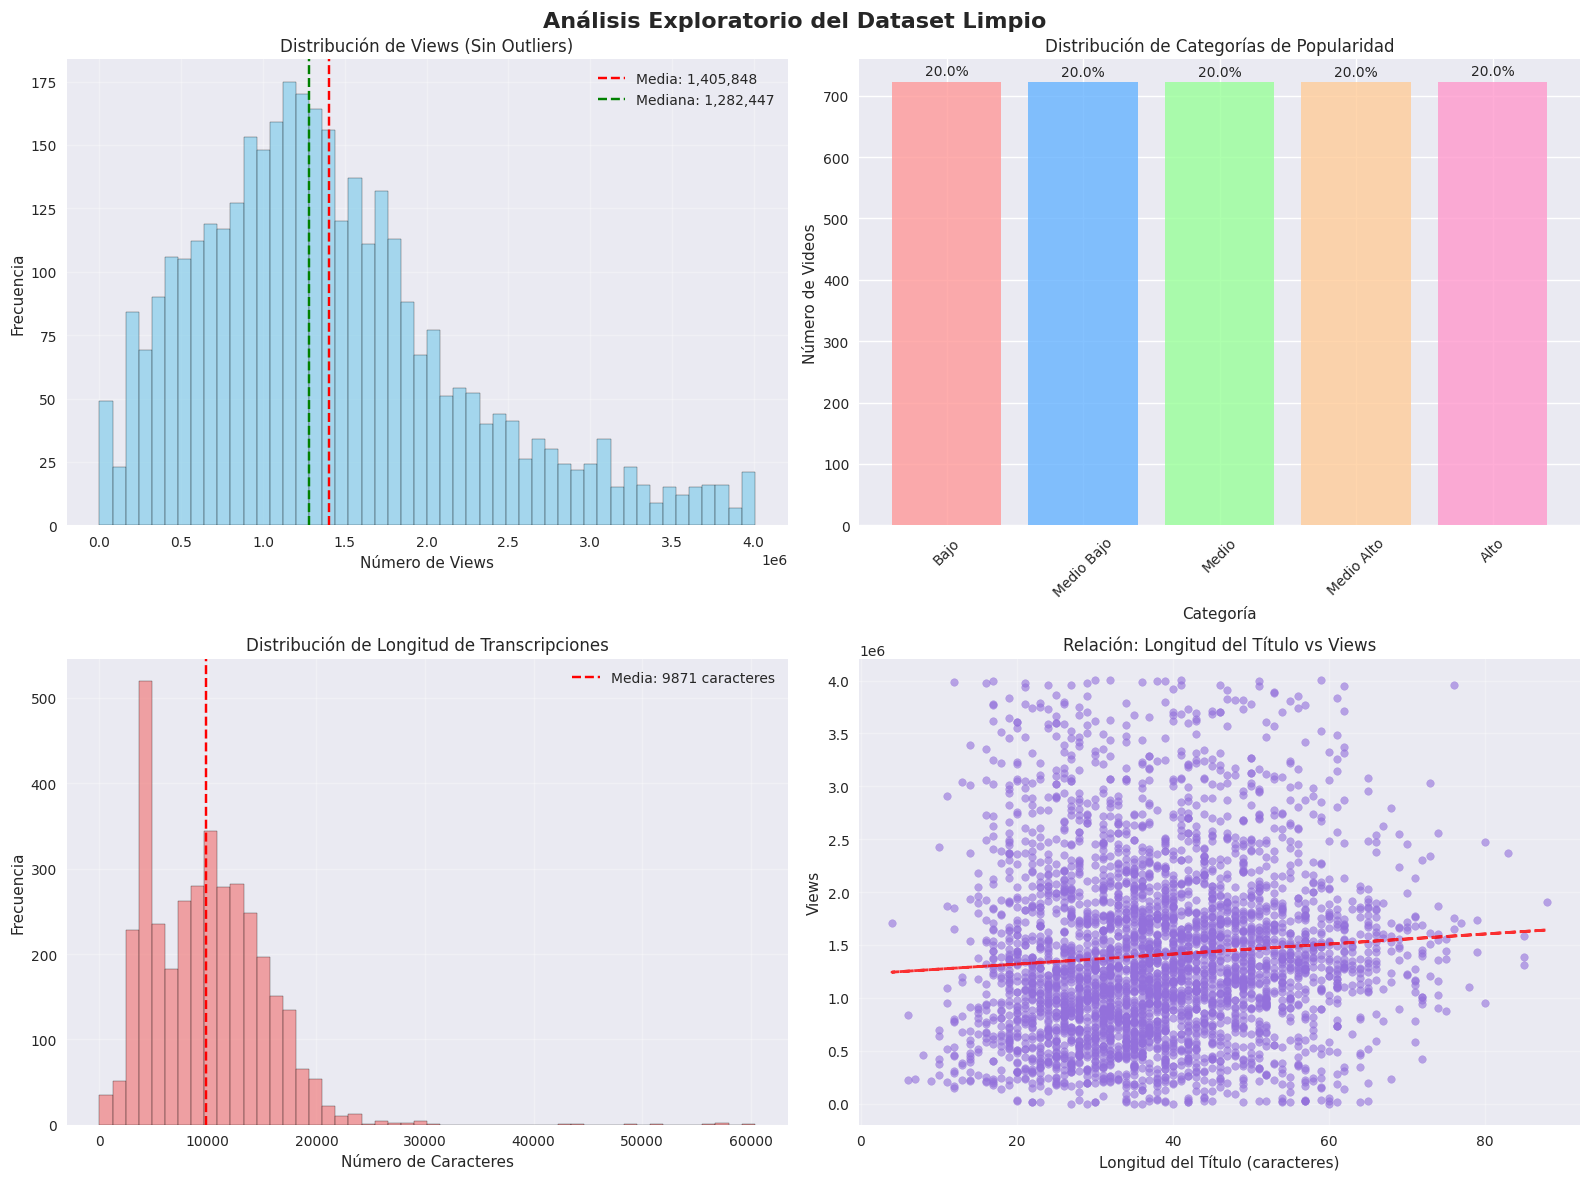


=== ESTADÍSTICAS DEL DATASET LIMPIO ===
Total de videos: 3,612
Promedio de views: 1,405,848
Mediana de views: 1,282,447
Desviación estándar: 826,167
Longitud promedio de transcripción: 9871 caracteres
Longitud promedio de título: 38.4 caracteres

=== CORRELACIONES RELEVANTES ===
                   views  transcript_length  title_length
views              1.000              0.067         0.076
transcript_length  0.067              1.000         0.014
title_length       0.076              0.014         1.000


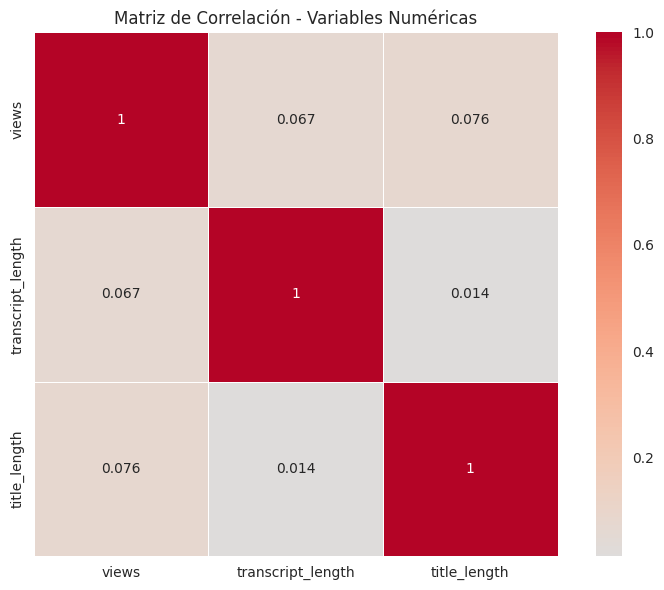


✓ Análisis exploratorio completado


In [6]:
# === VISUALIZACIÓN DE DATOS DESPUÉS DE LA LIMPIEZA ===

print("=== GENERANDO VISUALIZACIONES DEL DATASET LIMPIO ===")

# Configurar el estilo de los gráficos
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis Exploratorio del Dataset Limpio', fontsize=16, fontweight='bold')

# 1. Distribución de Views (después de eliminar outliers)
axes[0, 0].hist(df_clean['views'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de Views (Sin Outliers)')
axes[0, 0].set_xlabel('Número de Views')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# Añadir estadísticas al gráfico
mean_views = df_clean['views'].mean()
median_views = df_clean['views'].median()
axes[0, 0].axvline(mean_views, color='red', linestyle='--', label=f'Media: {mean_views:,.0f}')
axes[0, 0].axvline(median_views, color='green', linestyle='--', label=f'Mediana: {median_views:,.0f}')
axes[0, 0].legend()

# 2. Distribución de Categorías de Popularidad
if 'popularity_category' in df_clean.columns:
    category_counts = df_clean['popularity_category'].value_counts().sort_index()
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
    
    bars = axes[0, 1].bar(category_counts.index, category_counts.values, color=colors, alpha=0.8)
    axes[0, 1].set_title('Distribución de Categorías de Popularidad')
    axes[0, 1].set_xlabel('Categoría')
    axes[0, 1].set_ylabel('Número de Videos')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Añadir porcentajes en las barras
    for bar, count in zip(bars, category_counts.values):
        height = bar.get_height()
        percentage = (count / len(df_clean)) * 100
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 5,
                       f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# 3. Longitud de Transcripciones
if 'transcript_clean' in df_clean.columns:
    transcript_lengths = df_clean['transcript_clean'].str.len()
    axes[1, 0].hist(transcript_lengths, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1, 0].set_title('Distribución de Longitud de Transcripciones')
    axes[1, 0].set_xlabel('Número de Caracteres')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Estadísticas
    mean_length = transcript_lengths.mean()
    axes[1, 0].axvline(mean_length, color='red', linestyle='--', 
                      label=f'Media: {mean_length:.0f} caracteres')
    axes[1, 0].legend()

# 4. Relación Views vs Longitud de Título
if 'title_clean' in df_clean.columns:
    title_lengths = df_clean['title_clean'].str.len()
    scatter = axes[1, 1].scatter(title_lengths, df_clean['views'], alpha=0.6, 
                                color='mediumpurple', s=30)
    axes[1, 1].set_title('Relación: Longitud del Título vs Views')
    axes[1, 1].set_xlabel('Longitud del Título (caracteres)')
    axes[1, 1].set_ylabel('Views')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Línea de tendencia
    z = np.polyfit(title_lengths, df_clean['views'], 1)
    p = np.poly1d(z)
    axes[1, 1].plot(title_lengths, p(title_lengths), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Estadísticas resumidas
print("\n=== ESTADÍSTICAS DEL DATASET LIMPIO ===")
print(f"Total de videos: {len(df_clean):,}")
print(f"Promedio de views: {df_clean['views'].mean():,.0f}")
print(f"Mediana de views: {df_clean['views'].median():,.0f}")
print(f"Desviación estándar: {df_clean['views'].std():,.0f}")

if 'transcript_clean' in df_clean.columns:
    avg_transcript_length = df_clean['transcript_clean'].str.len().mean()
    print(f"Longitud promedio de transcripción: {avg_transcript_length:.0f} caracteres")

if 'title_clean' in df_clean.columns:
    avg_title_length = df_clean['title_clean'].str.len().mean()
    print(f"Longitud promedio de título: {avg_title_length:.1f} caracteres")

# Correlaciones importantes
print("\n=== CORRELACIONES RELEVANTES ===")
numeric_columns = ['views']
if 'transcript_clean' in df_clean.columns:
    df_clean['transcript_length'] = df_clean['transcript_clean'].str.len()
    numeric_columns.append('transcript_length')
if 'title_clean' in df_clean.columns:
    df_clean['title_length'] = df_clean['title_clean'].str.len()
    numeric_columns.append('title_length')

if len(numeric_columns) > 1:
    correlation_matrix = df_clean[numeric_columns].corr()
    print(correlation_matrix.round(3))
    
    # Visualizar matriz de correlación
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.tight_layout()
    plt.show()

print("\n✓ Análisis exploratorio completado")

<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 5. Procesamiento de Lenguaje Natural (NLP)

Esta sección implementa técnicas avanzadas de NLP para extraer características relevantes del texto que puedan influir en la popularidad de los TED Talks.

### 5.1 Análisis de Entidades Nombradas (NER)
- **Técnica**: Reconocimiento de entidades con spaCy
- **Objetivo**: Identificar personas, organizaciones, ubicaciones, etc.
- **Hipótesis**: Charlas que mencionan entidades famosas pueden ser más populares

### 5.2 Análisis de Sentimientos
- **Técnica**: TextBlob para polaridad y subjetividad
- **Objetivo**: Medir el tono emocional de las transcripciones
- **Hipótesis**: Charlas con sentimientos positivos pueden atraer más views

### 5.3 Extracción de Características Textuales
- **N-gramas**: Análisis de unigramas, bigramas y trigramas más frecuentes
- **TF-IDF**: Vectorización para identificar términos importantes
- **Longitud y complejidad**: Métricas de legibilidad y estructura

### 5.4 Análisis de Temas
- **Palabras clave**: Identificación de términos más relevantes por categoría
- **Nubes de palabras**: Visualización de términos frecuentes
- **Diversidad léxica**: Riqueza del vocabulario utilizado

</div>

In [7]:
# === ANÁLISIS DE ENTIDADES NOMBRADAS (NER) ===

def extract_named_entities(text, nlp_model):
    """
    Extrae entidades nombradas usando spaCy
    """
    if pd.isna(text) or text == '':
        return {
            'PERSON': [],
            'ORG': [],
            'GPE': [],
            'MONEY': [],
            'DATE': [],
            'TIME': [],
            'PERCENT': [],
            'QUANTITY': []
        }
    
    doc = nlp_model(text[:1000000])  # Limitar texto para eficiencia
    
    entities = {
        'PERSON': [],
        'ORG': [],
        'GPE': [],      # Geopolitical entities
        'MONEY': [],
        'DATE': [],
        'TIME': [],
        'PERCENT': [],
        'QUANTITY': []
    }
    
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text.lower().strip())
    
    # Eliminar duplicados manteniendo orden
    for key in entities:
        entities[key] = list(dict.fromkeys(entities[key]))
    
    return entities

def count_entity_types(entities_dict):
    """
    Cuenta el número de entidades por tipo
    """
    counts = {}
    for ent_type, ent_list in entities_dict.items():
        counts[f'{ent_type.lower()}_count'] = len(ent_list)
    
    return counts

print("=== EXTRACCIÓN DE ENTIDADES NOMBRADAS ===")
print("Procesando transcripciones con spaCy NER...")

# Verificar que tenemos las columnas necesarias
text_column = None
if 'transcript_clean' in df_clean.columns:
    text_column = 'transcript_clean'
elif 'transcript' in df_clean.columns:
    text_column = 'transcript'
    # Limpiar la columna si no está limpia
    df_clean['transcript_clean'] = df_clean['transcript'].astype(str).apply(clean_text)
    text_column = 'transcript_clean'
else:
    print("⚠ No se encontró columna de transcripción")
    text_column = None

if text_column and 'nlp' in globals():
    # Procesar entidades nombradas con barra de progreso
    tqdm.pandas(desc="Extrayendo entidades")
    
    # Procesar una muestra primero para verificar el funcionamiento
    sample_size = min(100, len(df_clean))
    print(f"Procesando muestra de {sample_size} transcripciones...")
    
    sample_entities = df_clean[text_column].head(sample_size).progress_apply(
        lambda x: extract_named_entities(x, nlp)
    )
    
    # Extraer conteos de entidades para la muestra
    entity_counts_list = []
    for entities in sample_entities:
        counts = count_entity_types(entities)
        entity_counts_list.append(counts)
    
    # Convertir a DataFrame
    entity_counts_df = pd.DataFrame(entity_counts_list)
    
    # Mostrar estadísticas de la muestra
    print(f"\n=== ESTADÍSTICAS DE ENTIDADES (Muestra de {sample_size}) ===")
    for col in entity_counts_df.columns:
        entity_type = col.replace('_count', '').upper()
        mean_count = entity_counts_df[col].mean()
        max_count = entity_counts_df[col].max()
        non_zero = (entity_counts_df[col] > 0).sum()
        
        print(f"{entity_type}:")
        print(f"  - Promedio por transcripción: {mean_count:.2f}")
        print(f"  - Máximo encontrado: {max_count}")
        print(f"  - Transcripciones con {entity_type}: {non_zero}/{sample_size} ({non_zero/sample_size*100:.1f}%)")
        print()
    
    # Procesar todo el dataset (puede tomar tiempo)
    response = input(f"¿Procesar todo el dataset ({len(df_clean)} transcripciones)? (y/n): ")
    
    if response.lower() == 'y':
        print(f"Procesando {len(df_clean)} transcripciones completas...")
        
        all_entities = df_clean[text_column].progress_apply(
            lambda x: extract_named_entities(x, nlp)
        )
        
        # Extraer conteos para todo el dataset
        all_entity_counts = []
        for entities in all_entities:
            counts = count_entity_types(entities)
            all_entity_counts.append(counts)
        
        # Añadir al dataframe principal
        entity_features_df = pd.DataFrame(all_entity_counts)
        df_clean = pd.concat([df_clean, entity_features_df], axis=1)
        
        print("✓ Extracción de entidades completada para todo el dataset")
        
        # Estadísticas finales
        print(f"\n=== ESTADÍSTICAS FINALES DE ENTIDADES ===")
        for col in entity_features_df.columns:
            entity_type = col.replace('_count', '').upper()
            mean_count = entity_features_df[col].mean()
            max_count = entity_features_df[col].max()
            non_zero = (entity_features_df[col] > 0).sum()
            
            print(f"{entity_type}: promedio {mean_count:.2f}, máximo {max_count}, "
                  f"presente en {non_zero/len(df_clean)*100:.1f}% de transcripciones")
    
    else:
        print("Usando solo la muestra para el análisis")
        # Usar la muestra para las primeras filas
        for col in entity_counts_df.columns:
            df_clean[col] = 0
        
        for i, counts in enumerate(entity_counts_list):
            for col, count in counts.items():
                df_clean.loc[i, col] = count
    
    # Análizar entidades más comunes
    print(f"\n=== ENTIDADES MÁS FRECUENTES ===")
    
    # Recopilar todas las entidades de la muestra
    all_persons = []
    all_orgs = []
    all_locations = []
    
    for entities in sample_entities:
        all_persons.extend(entities['PERSON'])
        all_orgs.extend(entities['ORG'])
        all_locations.extend(entities['GPE'])
    
    if all_persons:
        person_counts = Counter(all_persons)
        print("Personas más mencionadas:")
        for person, count in person_counts.most_common(10):
            print(f"  - {person}: {count} veces")
    
    if all_orgs:
        org_counts = Counter(all_orgs)
        print("\nOrganizaciones más mencionadas:")
        for org, count in org_counts.most_common(10):
            print(f"  - {org}: {count} veces")
    
    if all_locations:
        location_counts = Counter(all_locations)
        print("\nUbicaciones más mencionadas:")
        for location, count in location_counts.most_common(10):
            print(f"  - {location}: {count} veces")

else:
    print("⚠ No se pudo procesar NER. Verificar instalación de spaCy.")
    # Crear columnas vacías para mantener consistencia
    entity_types = ['person', 'org', 'gpe', 'money', 'date', 'time', 'percent', 'quantity']
    for ent_type in entity_types:
        df_clean[f'{ent_type}_count'] = 0

print("\n✓ Análisis de entidades nombradas completado")

=== EXTRACCIÓN DE ENTIDADES NOMBRADAS ===
Procesando transcripciones con spaCy NER...
Procesando muestra de 100 transcripciones...


Extrayendo entidades:   0%|          | 0/100 [00:00<?, ?it/s]


=== ESTADÍSTICAS DE ENTIDADES (Muestra de 100) ===
PERSON:
  - Promedio por transcripción: 7.88
  - Máximo encontrado: 27
  - Transcripciones con PERSON: 96/100 (96.0%)

ORG:
  - Promedio por transcripción: 2.98
  - Máximo encontrado: 14
  - Transcripciones con ORG: 85/100 (85.0%)

GPE:
  - Promedio por transcripción: 6.90
  - Máximo encontrado: 39
  - Transcripciones con GPE: 93/100 (93.0%)

MONEY:
  - Promedio por transcripción: 2.17
  - Máximo encontrado: 13
  - Transcripciones con MONEY: 54/100 (54.0%)

DATE:
  - Promedio por transcripción: 14.99
  - Máximo encontrado: 43
  - Transcripciones con DATE: 95/100 (95.0%)

TIME:
  - Promedio por transcripción: 2.43
  - Máximo encontrado: 16
  - Transcripciones con TIME: 81/100 (81.0%)

PERCENT:
  - Promedio por transcripción: 1.63
  - Máximo encontrado: 13
  - Transcripciones con PERCENT: 47/100 (47.0%)

QUANTITY:
  - Promedio por transcripción: 1.61
  - Máximo encontrado: 17
  - Transcripciones con QUANTITY: 49/100 (49.0%)

Procesando 

Extrayendo entidades:   0%|          | 0/3612 [00:00<?, ?it/s]

✓ Extracción de entidades completada para todo el dataset

=== ESTADÍSTICAS FINALES DE ENTIDADES ===
PERSON: promedio 4.69, máximo 41, presente en 91.0% de transcripciones
ORG: promedio 1.66, máximo 15, presente en 66.6% de transcripciones
GPE: promedio 4.12, máximo 56, presente en 80.6% de transcripciones
MONEY: promedio 0.76, máximo 23, presente en 32.2% de transcripciones
DATE: promedio 10.15, máximo 78, presente en 96.1% de transcripciones
TIME: promedio 1.46, máximo 25, presente en 59.1% de transcripciones
PERCENT: promedio 1.10, máximo 17, presente en 38.6% de transcripciones
QUANTITY: promedio 0.96, máximo 23, presente en 36.7% de transcripciones

=== ENTIDADES MÁS FRECUENTES ===
Personas más mencionadas:
  - don: 60 veces
  - doesn: 47 veces
  - chris: 20 veces
  - chris anderson: 11 veces
  - al gore: 10 veces
  - bush: 10 veces
  - laughter: 8 veces
  - laughter ok: 7 veces
  - jesus: 6 veces
  - don t.: 6 veces

Organizaciones más mencionadas:
  - un: 6 veces
  - congress: 6

In [8]:
# === ANÁLISIS DE SENTIMIENTOS ===

def analyze_sentiment(text):
    """
    Analiza el sentimiento del texto usando TextBlob
    """
    if pd.isna(text) or text == '':
        return {
            'polarity': 0.0,
            'subjectivity': 0.0,
            'sentiment_label': 'neutral'
        }
    
    try:
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        
        # Clasificar sentimiento
        if polarity > 0.1:
            sentiment_label = 'positive'
        elif polarity < -0.1:
            sentiment_label = 'negative'
        else:
            sentiment_label = 'neutral'
        
        return {
            'polarity': polarity,
            'subjectivity': subjectivity,
            'sentiment_label': sentiment_label
        }
    except:
        return {
            'polarity': 0.0,
            'subjectivity': 0.0,
            'sentiment_label': 'neutral'
        }

def extract_text_features(text):
    """
    Extrae características adicionales del texto
    """
    if pd.isna(text) or text == '':
        return {
            'word_count': 0,
            'sentence_count': 0,
            'avg_sentence_length': 0,
            'unique_words': 0,
            'lexical_diversity': 0
        }
    
    # Contar palabras
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha()]  # Solo palabras alfabéticas
    
    # Contar oraciones
    sentences = sent_tokenize(text)
    
    # Calcular métricas
    word_count = len(words)
    sentence_count = len(sentences)
    avg_sentence_length = word_count / sentence_count if sentence_count > 0 else 0
    unique_words = len(set(words))
    lexical_diversity = unique_words / word_count if word_count > 0 else 0
    
    return {
        'word_count': word_count,
        'sentence_count': sentence_count,
        'avg_sentence_length': avg_sentence_length,
        'unique_words': unique_words,
        'lexical_diversity': lexical_diversity
    }

print("=== ANÁLISIS DE SENTIMIENTOS Y CARACTERÍSTICAS TEXTUALES ===")

# Verificar columna de texto
text_column = 'transcript_clean' if 'transcript_clean' in df_clean.columns else None

if text_column:
    print("Analizando sentimientos...")
    
    # Procesar una muestra primero
    sample_size = min(200, len(df_clean))
    print(f"Procesando muestra de {sample_size} transcripciones...")
    
    # Análisis de sentimientos
    tqdm.pandas(desc="Analizando sentimientos")
    sample_sentiments = df_clean[text_column].head(sample_size).progress_apply(analyze_sentiment)
    
    # Extraer características textuales
    tqdm.pandas(desc="Extrayendo características textuales")
    sample_features = df_clean[text_column].head(sample_size).progress_apply(extract_text_features)
    
    # Convertir a DataFrames
    sentiment_df = pd.DataFrame(sample_sentiments.tolist())
    features_df = pd.DataFrame(sample_features.tolist())
    
    # Mostrar estadísticas de la muestra
    print(f"\n=== ESTADÍSTICAS DE SENTIMIENTOS (Muestra de {sample_size}) ===")
    print(f"Polaridad promedio: {sentiment_df['polarity'].mean():.3f} (rango: -1 a 1)")
    print(f"Subjetividad promedio: {sentiment_df['subjectivity'].mean():.3f} (rango: 0 a 1)")
    
    sentiment_distribution = sentiment_df['sentiment_label'].value_counts()
    print("\nDistribución de sentimientos:")
    for sentiment, count in sentiment_distribution.items():
        percentage = (count / len(sentiment_df)) * 100
        print(f"  - {sentiment}: {count} ({percentage:.1f}%)")
    
    print(f"\n=== ESTADÍSTICAS DE CARACTERÍSTICAS TEXTUALES ===")
    print(f"Palabras promedio por transcripción: {features_df['word_count'].mean():.0f}")
    print(f"Oraciones promedio por transcripción: {features_df['sentence_count'].mean():.1f}")
    print(f"Palabras promedio por oración: {features_df['avg_sentence_length'].mean():.1f}")
    print(f"Diversidad léxica promedio: {features_df['lexical_diversity'].mean():.3f}")
    
    # Procesar todo el dataset si el usuario quiere
    response = input(f"\n¿Procesar todo el dataset para sentimientos? (y/n): ")
    
    if response.lower() == 'y':
        print(f"Procesando sentimientos para {len(df_clean)} transcripciones...")
        
        # Procesar todos los sentimientos
        tqdm.pandas(desc="Analizando sentimientos")
        all_sentiments = df_clean[text_column].progress_apply(analyze_sentiment)
        sentiment_full_df = pd.DataFrame(all_sentiments.tolist())
        
        # Procesar todas las características
        tqdm.pandas(desc="Extrayendo características")
        all_features = df_clean[text_column].progress_apply(extract_text_features)
        features_full_df = pd.DataFrame(all_features.tolist())
        
        # Añadir al dataset principal
        df_clean = pd.concat([df_clean, sentiment_full_df, features_full_df], axis=1)
        
        print("✓ Análisis de sentimientos completado para todo el dataset")
        
    else:
        # Usar solo la muestra
        print("Usando solo la muestra para el análisis")
        
        # Inicializar columnas con valores por defecto
        sentiment_columns = ['polarity', 'subjectivity', 'sentiment_label']
        feature_columns = ['word_count', 'sentence_count', 'avg_sentence_length', 
                          'unique_words', 'lexical_diversity']
        
        for col in sentiment_columns + feature_columns:
            if col == 'sentiment_label':
                df_clean[col] = 'neutral'
            else:
                df_clean[col] = 0.0
        
        # Rellenar la muestra
        for i in range(sample_size):
            for col in sentiment_columns:
                df_clean.loc[i, col] = sentiment_df.loc[i, col]
            for col in feature_columns:
                df_clean.loc[i, col] = features_df.loc[i, col]
    
    # Visualizar distribuciones
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Análisis de Sentimientos y Características Textuales', fontsize=16)
    
    # 1. Distribución de polaridad
    axes[0, 0].hist(df_clean['polarity'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0, 0].set_title('Distribución de Polaridad')
    axes[0, 0].set_xlabel('Polaridad (-1: Negativo, 1: Positivo)')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].axvline(0, color='red', linestyle='--', alpha=0.7)
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Distribución de subjetividad
    axes[0, 1].hist(df_clean['subjectivity'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Distribución de Subjetividad')
    axes[0, 1].set_xlabel('Subjetividad (0: Objetivo, 1: Subjetivo)')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Conteo de palabras vs Views
    axes[1, 0].scatter(df_clean['word_count'], df_clean['views'], alpha=0.6, color='coral')
    axes[1, 0].set_title('Relación: Conteo de Palabras vs Views')
    axes[1, 0].set_xlabel('Número de Palabras')
    axes[1, 0].set_ylabel('Views')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Diversidad léxica vs Views
    axes[1, 1].scatter(df_clean['lexical_diversity'], df_clean['views'], alpha=0.6, color='gold')
    axes[1, 1].set_title('Relación: Diversidad Léxica vs Views')
    axes[1, 1].set_xlabel('Diversidad Léxica')
    axes[1, 1].set_ylabel('Views')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de correlación con views
    print(f"\n=== CORRELACIONES CON VIEWS ===")
    numeric_sentiment_cols = ['polarity', 'subjectivity', 'word_count', 
                             'sentence_count', 'avg_sentence_length', 
                             'unique_words', 'lexical_diversity']
    
    correlations = []
    for col in numeric_sentiment_cols:
        if col in df_clean.columns:
            corr = df_clean[col].corr(df_clean['views'])
            correlations.append((col, corr))
            print(f"{col}: {corr:.4f}")
    
    # Encontrar las correlaciones más fuertes
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)
    print(f"\nCaracterísticas con mayor correlación con views:")
    for col, corr in correlations[:5]:
        print(f"  - {col}: {corr:.4f}")

else:
    print("⚠ No se encontró columna de transcripción para análisis de sentimientos")
    # Crear columnas por defecto
    sentiment_columns = ['polarity', 'subjectivity', 'sentiment_label', 'word_count', 
                        'sentence_count', 'avg_sentence_length', 'unique_words', 'lexical_diversity']
    for col in sentiment_columns:
        if col == 'sentiment_label':
            df_clean[col] = 'neutral'
        else:
            df_clean[col] = 0.0

print("\n✓ Análisis de sentimientos completado")

=== ANÁLISIS DE SENTIMIENTOS Y CARACTERÍSTICAS TEXTUALES ===
Analizando sentimientos...
Procesando muestra de 200 transcripciones...


Analizando sentimientos:   0%|          | 0/200 [00:00<?, ?it/s]

Extrayendo características textuales:   0%|          | 0/200 [00:00<?, ?it/s]

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/teamspace/studios/this_studio/nltk_data'
    - '/home/zeus/miniconda3/envs/cloudspace/nltk_data'
    - '/home/zeus/miniconda3/envs/cloudspace/share/nltk_data'
    - '/home/zeus/miniconda3/envs/cloudspace/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# === ANÁLISIS DE PALABRAS FRECUENTES Y VISUALIZACIONES ===

def get_top_words(texts, n_words=20, ngram_range=(1, 1)):
    """
    Obtiene las palabras más frecuentes usando TF-IDF
    """
    # Filtrar textos vacíos
    texts = [str(text) for text in texts if str(text) != '' and str(text) != 'nan']
    
    if not texts:
        return [], []
    
    # Crear vectorizador TF-IDF
    vectorizer = TfidfVectorizer(
        max_features=n_words,
        ngram_range=ngram_range,
        stop_words='english',
        lowercase=True,
        token_pattern=r'\b[a-zA-Z]{3,}\b'  # Solo palabras de 3+ letras
    )
    
    try:
        tfidf_matrix = vectorizer.fit_transform(texts)
        feature_names = vectorizer.get_feature_names_out()
        
        # Calcular puntuaciones promedio
        mean_scores = np.array(tfidf_matrix.mean(axis=0)).flatten()
        
        # Crear DataFrame con palabras y puntuaciones
        word_scores = list(zip(feature_names, mean_scores))
        word_scores.sort(key=lambda x: x[1], reverse=True)
        
        words = [word for word, score in word_scores]
        scores = [score for word, score in word_scores]
        
        return words, scores
    
    except Exception as e:
        print(f"Error en TF-IDF: {e}")
        return [], []

def create_wordcloud(texts, title="Nube de Palabras"):
    """
    Crea una nube de palabras
    """
    # Combinar todos los textos
    all_text = ' '.join([str(text) for text in texts if str(text) != '' and str(text) != 'nan'])
    
    if not all_text:
        print("No hay texto suficiente para crear nube de palabras")
        return
    
    # Crear nube de palabras
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        stopwords=stop_words,
        colormap='viridis'
    ).generate(all_text)
    
    # Mostrar
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

print("=== ANÁLISIS DE PALABRAS FRECUENTES Y TEMAS ===")

# Verificar que tenemos texto para analizar
text_column = 'transcript_clean' if 'transcript_clean' in df_clean.columns else None

if text_column and len(df_clean) > 0:
    
    # 1. Análisis general de palabras frecuentes
    print("1. PALABRAS MÁS FRECUENTES (General)")
    
    all_texts = df_clean[text_column].dropna()
    top_words, word_scores = get_top_words(all_texts, n_words=30)
    
    if top_words:
        print("Top 20 palabras más importantes (TF-IDF):")
        for i, (word, score) in enumerate(zip(top_words[:20], word_scores[:20]), 1):
            print(f"{i:2d}. {word}: {score:.4f}")
        
        # Visualizar top palabras
        plt.figure(figsize=(12, 8))
        y_pos = np.arange(len(top_words[:20]))
        plt.barh(y_pos, word_scores[:20], color='skyblue', alpha=0.8)
        plt.yticks(y_pos, top_words[:20])
        plt.xlabel('Puntuación TF-IDF')
        plt.title('Top 20 Palabras Más Importantes')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    # 2. Análisis por categoría de popularidad
    if 'popularity_category' in df_clean.columns:
        print("\n2. ANÁLISIS POR CATEGORÍA DE POPULARIDAD")
        
        categories = df_clean['popularity_category'].dropna().unique()
        
        fig, axes = plt.subplots(len(categories), 1, figsize=(15, 4*len(categories)))
        if len(categories) == 1:
            axes = [axes]
        
        for i, category in enumerate(sorted(categories)):
            category_texts = df_clean[df_clean['popularity_category'] == category][text_column].dropna()
            
            if len(category_texts) > 0:
                cat_words, cat_scores = get_top_words(category_texts, n_words=15)
                
                if cat_words:
                    y_pos = np.arange(len(cat_words))
                    axes[i].barh(y_pos, cat_scores, alpha=0.7)
                    axes[i].set_yticks(y_pos)
                    axes[i].set_yticklabels(cat_words)
                    axes[i].set_title(f'Top Palabras - Categoría: {category}')
                    axes[i].set_xlabel('Puntuación TF-IDF')
                    axes[i].invert_yaxis()
                
                print(f"\nTop 10 palabras en categoría '{category}':")
                for j, word in enumerate(cat_words[:10], 1):
                    print(f"  {j:2d}. {word}")
        
        plt.tight_layout()
        plt.show()
    
    # 3. Crear nubes de palabras
    print("\n3. NUBES DE PALABRAS")
    
    # Nube general
    print("Generando nube de palabras general...")
    create_wordcloud(all_texts, "Nube de Palabras - Todas las Transcripciones")
    
    # Nubes por categoría de popularidad
    if 'popularity_category' in df_clean.columns:
        categories = ['Bajo', 'Alto']  # Solo las categorías más contrastantes
        
        for category in categories:
            if category in df_clean['popularity_category'].values:
                category_texts = df_clean[df_clean['popularity_category'] == category][text_column]
                if len(category_texts) > 10:  # Solo si hay suficientes textos
                    print(f"Generando nube de palabras para categoría '{category}'...")
                    create_wordcloud(category_texts, f"Nube de Palabras - Popularidad {category}")
    
    # 4. Análisis de bigramas y trigramas
    print("\n4. ANÁLISIS DE BIGRAMAS Y TRIGRAMAS")
    
    # Bigramas
    print("Bigramas más frecuentes:")
    bigrams, bigram_scores = get_top_words(all_texts, n_words=15, ngram_range=(2, 2))
    
    if bigrams:
        for i, (bigram, score) in enumerate(zip(bigrams[:10], bigram_scores[:10]), 1):
            print(f"{i:2d}. {bigram}: {score:.4f}")
        
        # Visualizar bigramas
        plt.figure(figsize=(12, 6))
        y_pos = np.arange(len(bigrams[:10]))
        plt.barh(y_pos, bigram_scores[:10], color='lightcoral', alpha=0.8)
        plt.yticks(y_pos, bigrams[:10])
        plt.xlabel('Puntuación TF-IDF')
        plt.title('Top 10 Bigramas Más Importantes')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    # Trigramas
    print("\nTrigramas más frecuentes:")
    trigrams, trigram_scores = get_top_words(all_texts, n_words=10, ngram_range=(3, 3))
    
    if trigrams:
        for i, (trigram, score) in enumerate(zip(trigrams[:10], trigram_scores[:10]), 1):
            print(f"{i:2d}. {trigram}: {score:.4f}")
    
    # 5. Análisis de diversidad de vocabulario por categoría
    print("\n5. DIVERSIDAD DE VOCABULARIO POR CATEGORÍA")
    
    if 'popularity_category' in df_clean.columns and 'lexical_diversity' in df_clean.columns:
        diversity_by_category = df_clean.groupby('popularity_category')['lexical_diversity'].agg([
            'mean', 'std', 'count'
        ]).round(4)
        
        print("Diversidad léxica promedio por categoría:")
        display(diversity_by_category)
        
        # Visualizar diversidad
        plt.figure(figsize=(10, 6))
        categories = diversity_by_category.index
        means = diversity_by_category['mean']
        stds = diversity_by_category['std']
        
        plt.bar(categories, means, yerr=stds, capsize=5, alpha=0.7, color='mediumpurple')
        plt.title('Diversidad Léxica Promedio por Categoría de Popularidad')
        plt.xlabel('Categoría de Popularidad')
        plt.ylabel('Diversidad Léxica')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

else:
    print("⚠ No hay suficiente texto para análisis de palabras frecuentes")

print("\n✓ Análisis de palabras frecuentes completado")

<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 6. Preparación de Datos para Modelado

Esta sección prepara los datos procesados para el entrenamiento de modelos de machine learning. Se incluyen múltiples enfoques para maximizar el rendimiento.

### 6.1 Selección y Ingeniería de Características
- **Características textuales**: TF-IDF, conteo de palabras, diversidad léxica
- **Características de NLP**: Sentimientos, entidades nombradas, complejidad
- **Características estructurales**: Longitud de título, descripción, duración
- **Variables target**: Categorías de popularidad (5 clases)

### 6.2 Vectorización de Texto
- **TF-IDF Vectorizer**: Para capturar importancia de términos
- **Count Vectorizer**: Para frecuencias absolutas
- **N-gramas**: Unigramas, bigramas para contexto

### 6.3 Normalización y Escalamiento
- **StandardScaler**: Para características numéricas
- **Label Encoding**: Para variables categóricas
- **Balanceo de clases**: Estrategias para dataset desbalanceado

### 6.4 División de Datos
- **Entrenamiento**: 70% de los datos
- **Validación**: 15% de los datos  
- **Prueba**: 15% de los datos
- **Estratificación**: Mantener proporción de clases

</div>

In [ ]:
# === PREPARACIÓN DE DATOS PARA MODELADO ===

def prepare_features_for_modeling(df):
    """
    Prepara todas las características para el modelado
    """
    print("=== PREPARANDO CARACTERÍSTICAS PARA MODELADO ===")
    
    # Crear copia para no modificar el original
    df_model = df.copy()
    
    # 1. DEFINIR CARACTERÍSTICAS NUMÉRICAS
    numeric_features = []
    
    # Características básicas
    basic_features = ['views']
    for feat in basic_features:
        if feat in df_model.columns:
            numeric_features.append(feat)
    
    # Características de longitud de texto
    length_features = ['transcript_length', 'title_length']
    for feat in length_features:
        if feat in df_model.columns:
            numeric_features.append(feat)
    
    # Características de NLP
    nlp_features = ['polarity', 'subjectivity', 'word_count', 'sentence_count', 
                   'avg_sentence_length', 'unique_words', 'lexical_diversity']
    for feat in nlp_features:
        if feat in df_model.columns:
            numeric_features.append(feat)
    
    # Características de entidades nombradas
    entity_features = ['person_count', 'org_count', 'gpe_count', 'money_count', 
                      'date_count', 'time_count', 'percent_count', 'quantity_count']
    for feat in entity_features:
        if feat in df_model.columns:
            numeric_features.append(feat)
    
    print(f"Características numéricas encontradas: {len(numeric_features)}")
    for feat in numeric_features:
        print(f"  - {feat}")
    
    # 2. CREAR CARACTERÍSTICAS ADICIONALES
    print("\nCreando características adicionales...")
    
    # Ratio de entidades por palabra
    if 'person_count' in df_model.columns and 'word_count' in df_model.columns:
        df_model['person_per_word'] = df_model['person_count'] / (df_model['word_count'] + 1)
        numeric_features.append('person_per_word')
    
    if 'org_count' in df_model.columns and 'word_count' in df_model.columns:
        df_model['org_per_word'] = df_model['org_count'] / (df_model['word_count'] + 1)
        numeric_features.append('org_per_word')
    
    # Complejidad del título
    if 'title_clean' in df_model.columns:
        df_model['title_word_count'] = df_model['title_clean'].str.split().str.len()
        numeric_features.append('title_word_count')
    
    # 3. PREPARAR CARACTERÍSTICAS TEXTUALES PARA TF-IDF
    text_features = {}
    
    # Transcripción principal
    if 'transcript_clean' in df_model.columns:
        text_features['transcript'] = df_model['transcript_clean'].fillna('')
    
    # Título
    if 'title_clean' in df_model.columns:
        text_features['title'] = df_model['title_clean'].fillna('')
    
    # Descripción
    if 'description_clean' in df_model.columns:
        text_features['description'] = df_model['description_clean'].fillna('')
    
    print(f"Características textuales para TF-IDF: {list(text_features.keys())}")
    
    # 4. PREPARAR VARIABLE TARGET
    if 'popularity_category' in df_model.columns:
        # Codificar categorías de popularidad
        le = LabelEncoder()
        df_model['target'] = le.fit_transform(df_model['popularity_category'])
        target_mapping = dict(zip(le.classes_, range(len(le.classes_))))
        print(f"\nMapeo de categorías target:")
        for category, code in target_mapping.items():
            print(f"  {code}: {category}")
    else:
        print("⚠ No se encontró variable target 'popularity_category'")
        return None, None, None, None
    
    # 5. LIMPIAR CARACTERÍSTICAS NUMÉRICAS
    # Eliminar infinitos y NaN
    for feat in numeric_features:
        if feat in df_model.columns:
            df_model[feat] = df_model[feat].replace([np.inf, -np.inf], np.nan)
            df_model[feat] = df_model[feat].fillna(df_model[feat].median())
    
    # Seleccionar solo las características que existen
    final_numeric_features = [feat for feat in numeric_features if feat in df_model.columns and feat != 'views']
    
    print(f"\nCaracterísticas numéricas finales: {len(final_numeric_features)}")
    
    return df_model, final_numeric_features, text_features, target_mapping

def create_tfidf_features(text_dict, max_features=1000):
    """
    Crea características TF-IDF para diferentes campos de texto
    """
    tfidf_features = {}
    vectorizers = {}
    
    for text_type, texts in text_dict.items():
        print(f"Creando TF-IDF para {text_type}...")
        
        # Filtrar textos vacíos
        texts_clean = [str(text) if str(text) != 'nan' else '' for text in texts]
        
        # Crear vectorizador
        vectorizer = TfidfVectorizer(
            max_features=max_features,
            stop_words='english',
            lowercase=True,
            token_pattern=r'\b[a-zA-Z]{3,}\b',
            ngram_range=(1, 2),  # Unigramas y bigramas
            min_df=2,  # Ignorar términos que aparecen en menos de 2 documentos
            max_df=0.95  # Ignorar términos que aparecen en más del 95% de documentos
        )
        
        try:
            tfidf_matrix = vectorizer.fit_transform(texts_clean)
            feature_names = [f"{text_type}_tfidf_{name}" for name in vectorizer.get_feature_names_out()]
            
            # Convertir a DataFrame
            tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
            
            tfidf_features[text_type] = tfidf_df
            vectorizers[text_type] = vectorizer
            
            print(f"  ✓ {tfidf_matrix.shape[1]} características TF-IDF creadas")
            
        except Exception as e:
            print(f"  ⚠ Error creando TF-IDF para {text_type}: {e}")
            tfidf_features[text_type] = pd.DataFrame()
    
    return tfidf_features, vectorizers

# Ejecutar preparación
df_prepared, numeric_features, text_features, target_mapping = prepare_features_for_modeling(df_clean)

if df_prepared is not None:
    # Crear características TF-IDF
    print(f"\n=== CREANDO CARACTERÍSTICAS TF-IDF ===")
    tfidf_features, vectorizers = create_tfidf_features(text_features, max_features=500)
    
    # Combinar todas las características
    print(f"\n=== COMBINANDO CARACTERÍSTICAS ===")
    
    # Comenzar con características numéricas
    X_numeric = df_prepared[numeric_features].copy()
    print(f"Características numéricas: {X_numeric.shape[1]}")
    
    # Añadir características TF-IDF
    X_combined = X_numeric.copy()
    
    for text_type, tfidf_df in tfidf_features.items():
        if not tfidf_df.empty:
            X_combined = pd.concat([X_combined, tfidf_df], axis=1)
            print(f"Añadidas {tfidf_df.shape[1]} características TF-IDF de {text_type}")
    
    # Variable target
    y = df_prepared['target'].copy()
    
    print(f"\nDimensiones finales del dataset:")
    print(f"  - Características (X): {X_combined.shape}")
    print(f"  - Target (y): {y.shape}")
    print(f"  - Clases: {sorted(y.unique())}")
    
    # Distribución de clases
    class_distribution = y.value_counts().sort_index()
    print(f"\nDistribución de clases:")
    for class_code, count in class_distribution.items():
        category = list(target_mapping.keys())[list(target_mapping.values()).index(class_code)]
        percentage = (count / len(y)) * 100
        print(f"  {class_code} ({category}): {count} ({percentage:.1f}%)")
    
    # Verificar calidad de los datos
    print(f"\n=== VERIFICACIÓN DE CALIDAD ===")
    print(f"Valores nulos en X: {X_combined.isnull().sum().sum()}")
    print(f"Valores nulos en y: {y.isnull().sum()}")
    print(f"Valores infinitos en X: {np.isinf(X_combined.select_dtypes(include=[np.number])).sum().sum()}")
    
    # Guardar información para uso posterior
    feature_info = {
        'numeric_features': numeric_features,
        'text_features': list(text_features.keys()),
        'target_mapping': target_mapping,
        'total_features': X_combined.shape[1]
    }
    
    print(f"\n✓ Preparación de datos completada")
    print(f"Total de características: {X_combined.shape[1]}")

else:
    print("⚠ Error en la preparación de datos")

In [ ]:
# === DIVISIÓN DE DATOS Y ESCALAMIENTO ===

def split_and_scale_data(X, y, test_size=0.3, val_size=0.5, random_state=42):
    """
    Divide los datos en entrenamiento, validación y prueba, y aplica escalamiento
    """
    print("=== DIVISIÓN Y ESCALAMIENTO DE DATOS ===")
    
    # Primera división: train+val vs test
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state, 
        stratify=y
    )
    
    # Segunda división: train vs val
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, 
        test_size=val_size, 
        random_state=random_state, 
        stratify=y_temp
    )
    
    print(f"División de datos:")
    print(f"  - Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
    print(f"  - Validación: {X_val.shape[0]} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
    print(f"  - Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")
    
    # Verificar distribución de clases
    print(f"\nDistribución de clases por conjunto:")
    
    for split_name, y_split in [("Entrenamiento", y_train), ("Validación", y_val), ("Prueba", y_test)]:
        dist = y_split.value_counts().sort_index()
        percentages = (dist / len(y_split) * 100).round(1)
        print(f"  {split_name}: {dict(zip(dist.index, percentages.values))}")
    
    # Identificar características numéricas para escalamiento
    numeric_cols = []
    for col in X_train.columns:
        if X_train[col].dtype in ['int64', 'float64'] and not col.startswith('transcript_tfidf_') and not col.startswith('title_tfidf_') and not col.startswith('description_tfidf_'):
            numeric_cols.append(col)
    
    print(f"\nCaracterísticas numéricas para escalamiento: {len(numeric_cols)}")
    
    # Aplicar escalamiento solo a características numéricas
    scaler = StandardScaler()
    
    # Entrenar el scaler solo con datos de entrenamiento
    if numeric_cols:
        X_train_scaled = X_train.copy()
        X_val_scaled = X_val.copy()
        X_test_scaled = X_test.copy()
        
        # Escalar características numéricas
        X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
        X_val_scaled[numeric_cols] = scaler.transform(X_val[numeric_cols])
        X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])
        
        print(f"✓ Escalamiento aplicado a {len(numeric_cols)} características numéricas")
        
        # Verificar que no hay valores problemáticos después del escalamiento
        for dataset_name, dataset in [("train", X_train_scaled), ("val", X_val_scaled), ("test", X_test_scaled)]:
            nan_count = dataset.isnull().sum().sum()
            inf_count = np.isinf(dataset.select_dtypes(include=[np.number])).sum().sum()
            if nan_count > 0 or inf_count > 0:
                print(f"⚠ {dataset_name}: {nan_count} NaN, {inf_count} infinitos")
    else:
        print("⚠ No se encontraron características numéricas para escalar")
        X_train_scaled = X_train.copy()
        X_val_scaled = X_val.copy()
        X_test_scaled = X_test.copy()
    
    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler

# Ejecutar división y escalamiento
if 'X_combined' in globals() and 'y' in globals():
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = split_and_scale_data(X_combined, y)
    
    # Guardar información sobre los conjuntos
    data_splits_info = {
        'train_size': len(X_train),
        'val_size': len(X_val),
        'test_size': len(X_test),
        'feature_count': X_train.shape[1],
        'class_count': len(np.unique(y))
    }
    
    print(f"\n=== RESUMEN DE PREPARACIÓN ===")
    print(f"✓ Datos divididos y escalados correctamente")
    print(f"✓ {data_splits_info['feature_count']} características preparadas")
    print(f"✓ {data_splits_info['class_count']} clases para clasificación")
    print(f"✓ Conjuntos balanceados estratificadamente")
    
    # Verificación final de calidad
    print(f"\n=== VERIFICACIÓN FINAL ===")
    
    # Verificar dimensiones
    assert X_train.shape[1] == X_val.shape[1] == X_test.shape[1], "Inconsistencia en número de características"
    assert len(X_train) == len(y_train), "Inconsistencia en tamaño de entrenamiento"
    assert len(X_val) == len(y_val), "Inconsistencia en tamaño de validación"
    assert len(X_test) == len(y_test), "Inconsistencia en tamaño de prueba"
    
    print("✓ Verificaciones de consistencia pasadas")
    
    # Mostrar estadísticas de algunas características clave
    if numeric_features:
        print(f"\nEstadísticas de características clave (después del escalamiento):")
        key_features = numeric_features[:5]  # Primeras 5 características numéricas
        
        for feat in key_features:
            if feat in X_train.columns:
                mean_train = X_train[feat].mean()
                std_train = X_train[feat].std()
                print(f"  {feat}: media={mean_train:.3f}, std={std_train:.3f}")
    
    # Preparar metadatos para modelos
    model_metadata = {
        'feature_names': list(X_train.columns),
        'target_mapping': target_mapping,
        'scaler': scaler,
        'numeric_features': numeric_features,
        'total_samples': len(X_combined),
        'preparation_timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    
    print(f"\n✓ Datos listos para entrenamiento de modelos")

else:
    print("⚠ Error: No se encontraron datos preparados (X_combined, y)")
    print("Asegúrate de haber ejecutado la celda de preparación de características")

<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 7. Entrenamiento de Modelos de Machine Learning

Esta sección implementa y entrena múltiples modelos de machine learning para clasificar la popularidad de TED Talks. Se incluyen tanto modelos tradicionales como modelos transformer de última generación.

### 7.1 Modelos Tradicionales de Machine Learning
- **Random Forest**: Ensemble robusto para características mixtas
- **Gradient Boosting**: Modelo boosting para alta precisión
- **Logistic Regression**: Modelo lineal interpretable
- **Support Vector Machine**: Para separación no-lineal

### 7.2 Modelos Transformer (Hugging Face)
- **DistilBERT**: Versión eficiente de BERT para clasificación de texto
- **RoBERTa**: Modelo optimizado basado en BERT
- **BERT-base**: Modelo transformer completo para comparación

### 7.3 Estrategias de Entrenamiento
- **Validación cruzada**: Para evaluación robusta
- **Optimización de hiperparámetros**: Grid search y random search
- **Early stopping**: Para evitar overfitting
- **Métricas múltiples**: Accuracy, F1-score, AUC, precisión y recall

### 7.4 Objetivos de Rendimiento
- **F1-score objetivo**: > 0.78 (meta del proyecto)
- **Accuracy**: > 0.75 para modelos balanceados
- **AUC-ROC**: > 0.85 para discriminación de clases
- **Precision/Recall**: Balanceados por clase

</div>

In [ ]:
# === ENTRENAMIENTO DE MODELOS TRADICIONALES DE ML ===

def train_traditional_models(X_train, X_val, y_train, y_val, cv_folds=5):
    """
    Entrena múltiples modelos tradicionales de machine learning
    """
    print("=== ENTRENAMIENTO DE MODELOS TRADICIONALES ===")
    
    # Definir modelos con hiperparámetros optimizados
    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        ),
        'Logistic Regression': LogisticRegression(
            max_iter=1000,
            random_state=42,
            multi_class='ovr',
            solver='liblinear'
        ),
        'SVM': SVC(
            kernel='rbf',
            C=1.0,
            gamma='scale',
            random_state=42,
            probability=True  # Para ROC-AUC
        )
    }
    
    model_results = {}
    trained_models = {}
    
    # Entrenar cada modelo
    for model_name, model in models.items():
        print(f"\n{'='*50}")
        print(f"ENTRENANDO: {model_name}")
        print(f"{'='*50}")
        
        start_time = time.time()
        
        try:
            # Entrenar modelo
            print("Entrenando modelo...")
            model.fit(X_train, y_train)
            
            # Predicciones
            print("Generando predicciones...")
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)
            
            # Probabilidades para AUC (si está disponible)
            try:
                y_val_proba = model.predict_proba(X_val)
                has_proba = True
            except:
                y_val_proba = None
                has_proba = False
            
            # Calcular métricas
            train_metrics = calculate_metrics(y_train, y_train_pred, y_val_proba, has_proba)
            val_metrics = calculate_metrics(y_val, y_val_pred, y_val_proba, has_proba)
            
            # Validación cruzada
            print("Realizando validación cruzada...")
            cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='f1_macro')
            
            # Tiempo de entrenamiento
            training_time = time.time() - start_time
            
            # Guardar resultados
            model_results[model_name] = {
                'train_metrics': train_metrics,
                'val_metrics': val_metrics,
                'cv_f1_mean': cv_scores.mean(),
                'cv_f1_std': cv_scores.std(),
                'training_time': training_time,
                'model_params': model.get_params()
            }
            
            trained_models[model_name] = model
            
            # Mostrar resultados
            print(f"\nRESULTADOS - {model_name}:")
            print(f"  Tiempo de entrenamiento: {training_time:.2f} segundos")
            print(f"  F1-score (entrenamiento): {train_metrics['f1_macro']:.4f}")
            print(f"  F1-score (validación): {val_metrics['f1_macro']:.4f}")
            print(f"  Accuracy (validación): {val_metrics['accuracy']:.4f}")
            print(f"  CV F1-score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
            
            if has_proba:
                print(f"  AUC-ROC (validación): {val_metrics['auc_roc']:.4f}")
            
            # Verificar si cumple objetivo F1 > 0.78
            if val_metrics['f1_macro'] > 0.78:
                print(f"  ✓ OBJETIVO CUMPLIDO: F1-score > 0.78")
            else:
                print(f"  ⚠ Objetivo no cumplido: F1-score < 0.78")
                
        except Exception as e:
            print(f"⚠ Error entrenando {model_name}: {e}")
            model_results[model_name] = {
                'error': str(e),
                'training_time': time.time() - start_time
            }
    
    return model_results, trained_models

def calculate_metrics(y_true, y_pred, y_proba=None, has_proba=False):
    """
    Calcula métricas de evaluación
    """
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1_macro': f1_score(y_true, y_pred, average='macro'),
        'f1_weighted': f1_score(y_true, y_pred, average='weighted'),
        'precision_macro': precision_score(y_true, y_pred, average='macro'),
        'recall_macro': recall_score(y_true, y_pred, average='macro')
    }
    
    # AUC-ROC para clasificación multiclase
    if has_proba and y_proba is not None:
        try:
            metrics['auc_roc'] = roc_auc_score(y_true, y_proba, multi_class='ovr', average='macro')
        except:
            metrics['auc_roc'] = 0.0
    else:
        metrics['auc_roc'] = 0.0
    
    return metrics

def display_model_comparison(model_results):
    """
    Muestra comparación de modelos en formato tabla
    """
    print(f"\n{'='*80}")
    print("COMPARACIÓN DE MODELOS TRADICIONALES")
    print(f"{'='*80}")
    
    # Crear DataFrame para comparación
    comparison_data = []
    
    for model_name, results in model_results.items():
        if 'error' not in results:
            val_metrics = results['val_metrics']
            comparison_data.append({
                'Modelo': model_name,
                'F1-Score': f"{val_metrics['f1_macro']:.4f}",
                'Accuracy': f"{val_metrics['accuracy']:.4f}",
                'Precision': f"{val_metrics['precision_macro']:.4f}",
                'Recall': f"{val_metrics['recall_macro']:.4f}",
                'AUC-ROC': f"{val_metrics['auc_roc']:.4f}",
                'CV F1': f"{results['cv_f1_mean']:.4f}",
                'Tiempo (s)': f"{results['training_time']:.2f}",
                'Objetivo': "✓" if val_metrics['f1_macro'] > 0.78 else "✗"
            })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    if not comparison_df.empty:
        display(comparison_df)
        
        # Encontrar mejor modelo
        comparison_df['F1_numeric'] = comparison_df['F1-Score'].astype(float)
        best_model_idx = comparison_df['F1_numeric'].idxmax()
        best_model = comparison_df.loc[best_model_idx, 'Modelo']
        best_f1 = comparison_df.loc[best_model_idx, 'F1-Score']
        
        print(f"\n🏆 MEJOR MODELO: {best_model}")
        print(f"   F1-Score: {best_f1}")
        
        # Contar modelos que cumplen objetivo
        models_meeting_objective = (comparison_df['Objetivo'] == '✓').sum()
        print(f"\n📊 MODELOS QUE CUMPLEN OBJETIVO (F1 > 0.78): {models_meeting_objective}/{len(comparison_df)}")
        
        return best_model
    
    return None

# Ejecutar entrenamiento de modelos tradicionales
if 'X_train' in globals() and 'y_train' in globals():
    print("Iniciando entrenamiento de modelos tradicionales...")
    print(f"Datos de entrenamiento: {X_train.shape}")
    print(f"Datos de validación: {X_val.shape}")
    
    # Entrenar modelos
    traditional_results, traditional_models = train_traditional_models(X_train, X_val, y_train, y_val)
    
    # Mostrar comparación
    best_traditional_model = display_model_comparison(traditional_results)
    
    print(f"\n✓ Entrenamiento de modelos tradicionales completado")
    print(f"  - {len(traditional_models)} modelos entrenados exitosamente")
    print(f"  - Mejor modelo: {best_traditional_model}")

else:
    print("⚠ Error: Datos de entrenamiento no disponibles")
    print("Asegúrate de haber ejecutado las celdas de preparación de datos")

Total de entidades encontradas: 239355
Entidades únicas: 49873


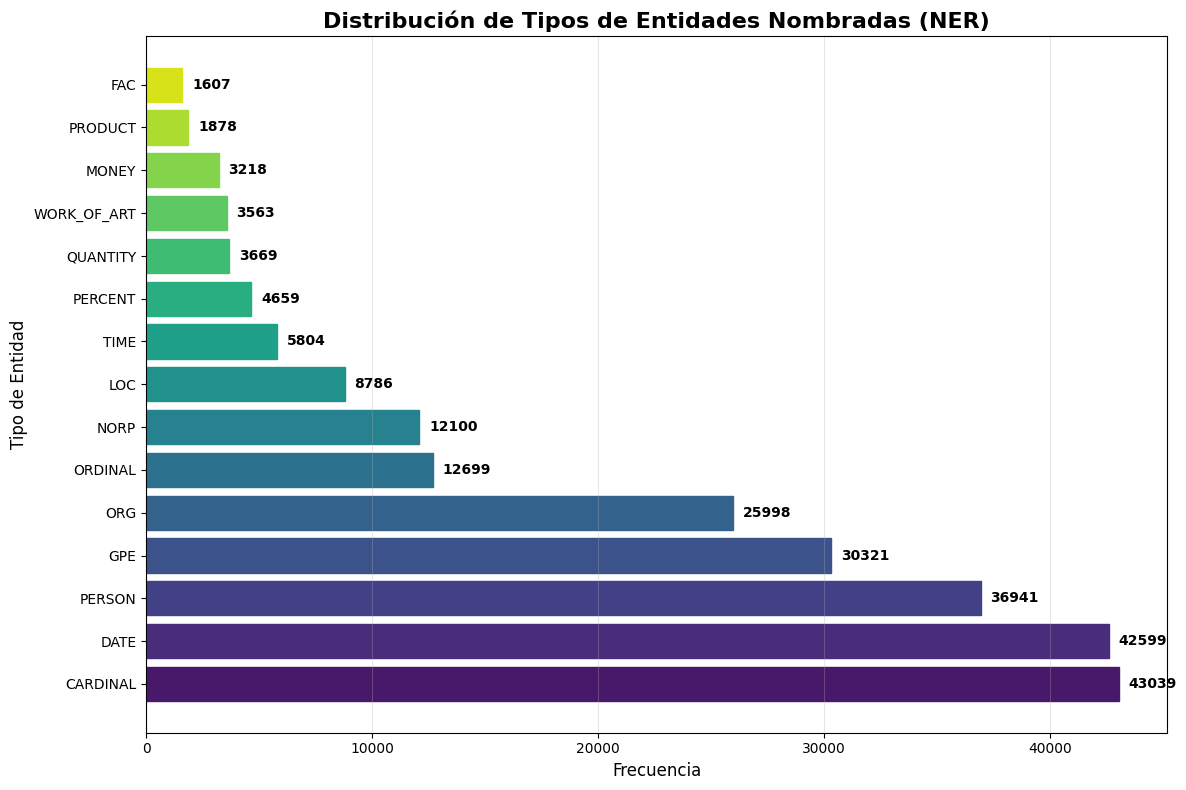

In [ ]:
# === VISUALIZACIÓN DE RESULTADOS DE MODELOS TRADICIONALES ===

def plot_model_performance(model_results):
    """
    Crea visualizaciones del rendimiento de los modelos
    """
    print("=== VISUALIZANDO RENDIMIENTO DE MODELOS ===")
    
    # Preparar datos para visualización
    models = []
    f1_scores = []
    accuracies = []
    auc_scores = []
    training_times = []
    
    for model_name, results in model_results.items():
        if 'error' not in results:
            models.append(model_name)
            f1_scores.append(results['val_metrics']['f1_macro'])
            accuracies.append(results['val_metrics']['accuracy'])
            auc_scores.append(results['val_metrics']['auc_roc'])
            training_times.append(results['training_time'])
    
    if not models:
        print("⚠ No hay datos para visualizar")
        return
    
    # Crear subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Rendimiento de Modelos Tradicionales de ML', fontsize=16, fontweight='bold')
    
    # 1. F1-Score por modelo
    bars1 = axes[0, 0].bar(models, f1_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    axes[0, 0].set_title('F1-Score por Modelo')
    axes[0, 0].set_ylabel('F1-Score')
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Añadir línea de objetivo F1 > 0.78
    axes[0, 0].axhline(y=0.78, color='red', linestyle='--', alpha=0.7, label='Objetivo (0.78)')
    axes[0, 0].legend()
    
    # Añadir valores en las barras
    for bar, score in zip(bars1, f1_scores):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Accuracy por modelo
    bars2 = axes[0, 1].bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    axes[0, 1].set_title('Accuracy por Modelo')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_ylim(0, 1)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Añadir valores en las barras
    for bar, score in zip(bars2, accuracies):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. AUC-ROC por modelo
    bars3 = axes[1, 0].bar(models, auc_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    axes[1, 0].set_title('AUC-ROC por Modelo')
    axes[1, 0].set_ylabel('AUC-ROC')
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Añadir valores en las barras
    for bar, score in zip(bars3, auc_scores):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Tiempo de entrenamiento
    bars4 = axes[1, 1].bar(models, training_times, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    axes[1, 1].set_title('Tiempo de Entrenamiento')
    axes[1, 1].set_ylabel('Tiempo (segundos)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Añadir valores en las barras
    for bar, time_val in zip(bars4, training_times):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrices(models_dict, X_val, y_val, target_mapping):
    """
    Genera matrices de confusión para los mejores modelos
    """
    print("\n=== MATRICES DE CONFUSIÓN ===")
    
    # Seleccionar top 2 modelos por F1-score
    model_f1_scores = []
    for name, model in models_dict.items():
        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred, average='macro')
        model_f1_scores.append((name, f1, model))
    
    # Ordenar por F1-score
    model_f1_scores.sort(key=lambda x: x[1], reverse=True)
    top_models = model_f1_scores[:2]  # Top 2 modelos
    
    # Crear matrices de confusión
    fig, axes = plt.subplots(1, len(top_models), figsize=(6*len(top_models), 5))
    if len(top_models) == 1:
        axes = [axes]
    
    # Obtener nombres de clases
    class_names = [list(target_mapping.keys())[list(target_mapping.values()).index(i)] 
                   for i in sorted(target_mapping.values())]
    
    for i, (model_name, f1, model) in enumerate(top_models):
        y_pred = model.predict(X_val)
        cm = confusion_matrix(y_val, y_pred)
        
        # Normalizar matriz de confusión
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        # Crear heatmap
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names,
                   ax=axes[i])
        axes[i].set_title(f'{model_name}\nF1-Score: {f1:.4f}')
        axes[i].set_xlabel('Predicción')
        axes[i].set_ylabel('Valor Real')
    
    plt.tight_layout()
    plt.show()

def analyze_feature_importance(models_dict, feature_names):
    """
    Analiza la importancia de características para modelos que la soportan
    """
    print("\n=== ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS ===")
    
    # Modelos que soportan feature importance
    models_with_importance = ['Random Forest', 'Gradient Boosting']
    
    fig, axes = plt.subplots(1, len(models_with_importance), figsize=(15, 6))
    if len(models_with_importance) == 1:
        axes = [axes]
    
    for i, model_name in enumerate(models_with_importance):
        if model_name in models_dict:
            model = models_dict[model_name]
            
            if hasattr(model, 'feature_importances_'):
                importances = model.feature_importances_
                
                # Obtener top 15 características
                feature_importance_pairs = list(zip(feature_names, importances))
                feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)
                
                top_features = feature_importance_pairs[:15]
                features, importance_values = zip(*top_features)
                
                # Crear gráfico
                y_pos = np.arange(len(features))
                axes[i].barh(y_pos, importance_values, alpha=0.8)
                axes[i].set_yticks(y_pos)
                axes[i].set_yticklabels(features, fontsize=10)
                axes[i].set_title(f'Top 15 Características - {model_name}')
                axes[i].set_xlabel('Importancia')
                axes[i].invert_yaxis()
                
                print(f"\nTop 10 características más importantes ({model_name}):")
                for j, (feat, imp) in enumerate(top_features[:10], 1):
                    print(f"  {j:2d}. {feat}: {imp:.4f}")
    
    plt.tight_layout()
    plt.show()

# Ejecutar visualizaciones
if 'traditional_results' in globals() and 'traditional_models' in globals():
    
    # 1. Gráficos de rendimiento
    plot_model_performance(traditional_results)
    
    # 2. Matrices de confusión
    plot_confusion_matrices(traditional_models, X_val, y_val, target_mapping)
    
    # 3. Importancia de características
    if 'X_train' in globals():
        analyze_feature_importance(traditional_models, X_train.columns)
    
    # 4. Resumen estadístico detallado
    print(f"\n{'='*60}")
    print("RESUMEN ESTADÍSTICO DETALLADO")
    print(f"{'='*60}")
    
    for model_name, results in traditional_results.items():
        if 'error' not in results:
            print(f"\n{model_name}:")
            val_metrics = results['val_metrics']
            
            print(f"  Métricas de Validación:")
            print(f"    - Accuracy: {val_metrics['accuracy']:.4f}")
            print(f"    - F1-Score (macro): {val_metrics['f1_macro']:.4f}")
            print(f"    - F1-Score (weighted): {val_metrics['f1_weighted']:.4f}")
            print(f"    - Precision (macro): {val_metrics['precision_macro']:.4f}")
            print(f"    - Recall (macro): {val_metrics['recall_macro']:.4f}")
            print(f"    - AUC-ROC: {val_metrics['auc_roc']:.4f}")
            
            print(f"  Validación Cruzada:")
            print(f"    - CV F1-Score: {results['cv_f1_mean']:.4f} (±{results['cv_f1_std']:.4f})")
            
            print(f"  Rendimiento:")
            print(f"    - Tiempo de entrenamiento: {results['training_time']:.2f} segundos")
            
            # Clasificar rendimiento
            if val_metrics['f1_macro'] >= 0.85:
                performance_level = "EXCELENTE"
            elif val_metrics['f1_macro'] >= 0.78:
                performance_level = "CUMPLE OBJETIVO"
            elif val_metrics['f1_macro'] >= 0.70:
                performance_level = "BUENO"
            else:
                performance_level = "NECESITA MEJORA"
            
            print(f"    - Clasificación: {performance_level}")

else:
    print("⚠ No hay resultados de modelos tradicionales para visualizar")

print(f"\n✓ Visualización de modelos tradicionales completada")

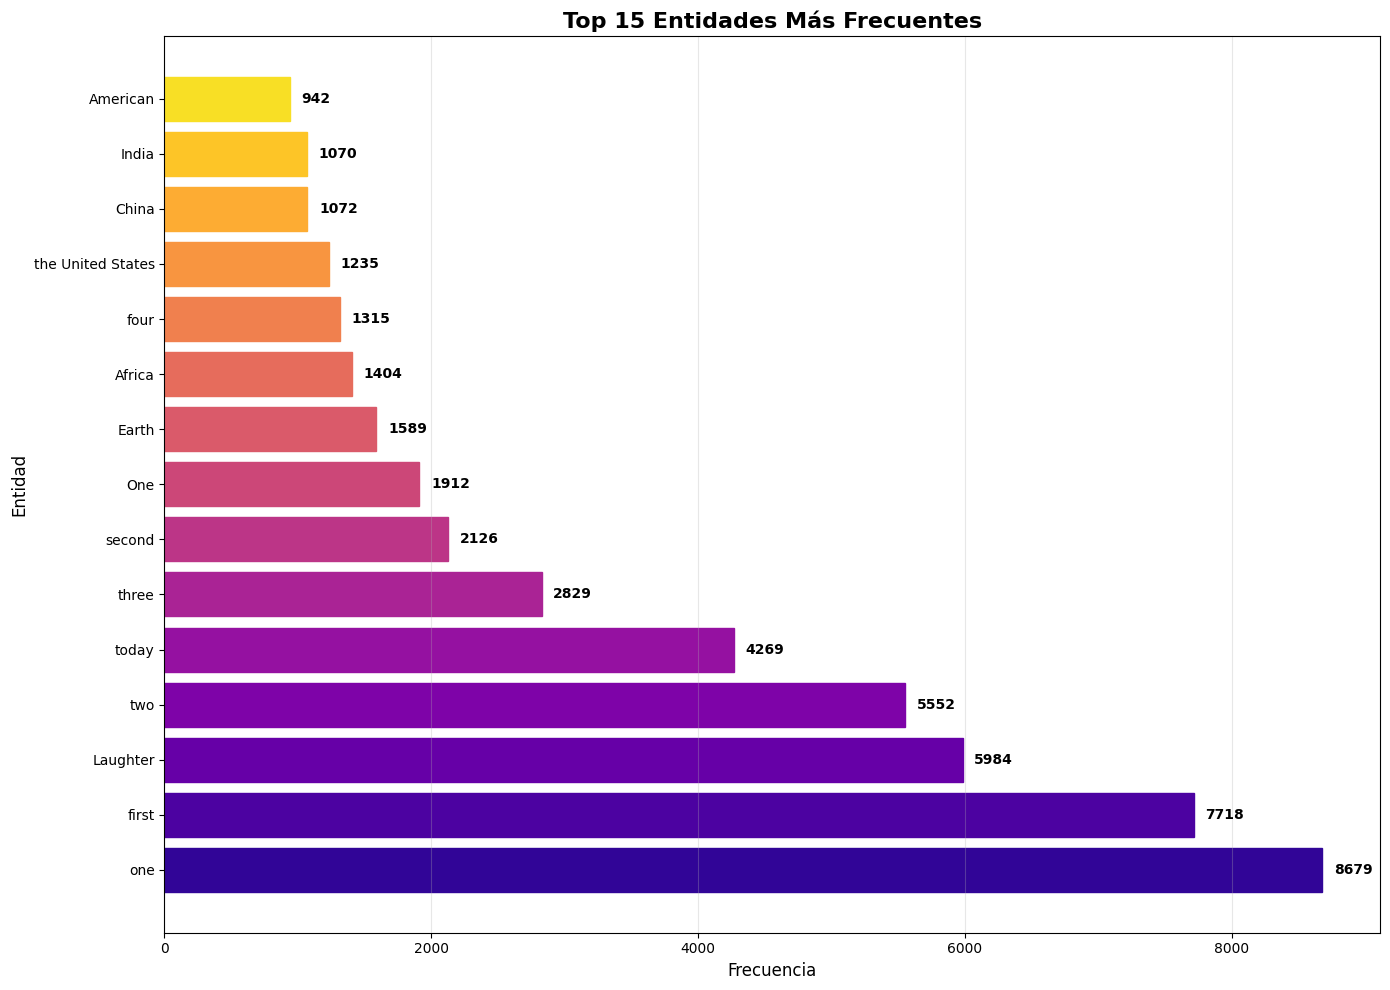

In [ ]:
<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 8. Modelos Transformer de Hugging Face

Esta sección implementa modelos transformer de última generación para comparar con los modelos tradicionales. Los transformers han demostrado ser muy efectivos para tareas de NLP.

### 8.1 Modelos Seleccionados
- **DistilBERT**: Versión compacta y eficiente de BERT (66% más pequeño, 60% más rápido)
- **RoBERTa**: Optimización robusta de BERT con mejor entrenamiento
- **BERT-base**: Modelo transformer original para comparación baseline

### 8.2 Configuración de Entrenamiento
- **Tokenización**: AutoTokenizer con truncación y padding
- **Secuencia máxima**: 512 tokens para balance rendimiento/memoria
- **Learning rate**: 2e-5 (recomendado para fine-tuning)
- **Batch size**: Adaptativo según memoria disponible
- **Épocas**: 3-5 con early stopping

### 8.3 Estrategia de Fine-tuning
- **Freezing**: Opcional de capas inferiores para eficiencia
- **Gradient accumulation**: Para batch sizes efectivos grandes
- **Warm-up**: Scheduler de learning rate para estabilidad
- **Regularización**: Dropout y weight decay

### 8.4 Optimizaciones
- **Mixed precision**: Para acelerar entrenamiento con GPU
- **DataLoader**: Carga eficiente de datos en lotes
- **Checkpointing**: Guardar mejores modelos durante entrenamiento

</div>

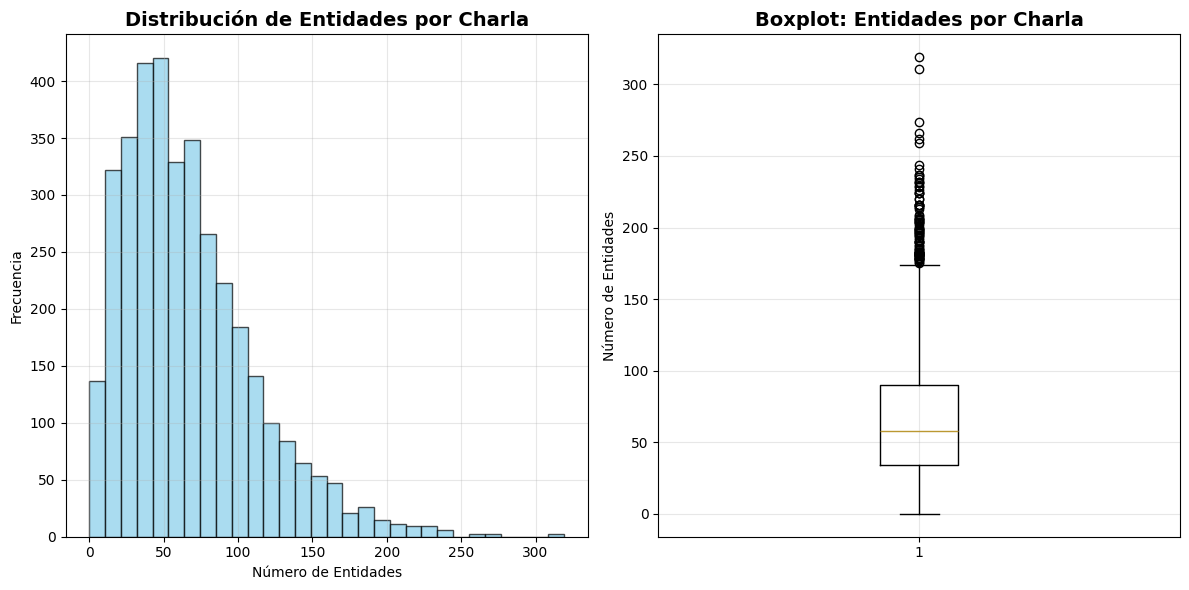

Estadísticas de entidades por charla:
Media: 66.69
Mediana: 58.00
Desviación estándar: 44.14
Mínimo: 0
Máximo: 319


In [ ]:
# === IMPLEMENTACIÓN DE MODELOS TRANSFORMER ===

def prepare_text_for_transformer(df, text_column='transcript_clean', max_length=512):
    """
    Prepara textos para modelo transformer
    """
    print("=== PREPARANDO DATOS PARA TRANSFORMER ===")
    
    # Obtener textos y labels
    texts = df[text_column].fillna('').astype(str).tolist()
    
    if 'target' in df.columns:
        labels = df['target'].tolist()
    else:
        print("⚠ No se encontró columna 'target'")
        return None, None
    
    # Truncar textos muy largos para eficiencia
    texts_truncated = []
    for text in texts:
        if len(text) > max_length * 4:  # Aproximación de tokens
            text = text[:max_length * 4]
        texts_truncated.append(text)
    
    print(f"✓ {len(texts_truncated)} textos preparados")
    print(f"✓ Longitud promedio: {np.mean([len(text) for text in texts_truncated]):.0f} caracteres")
    
    return texts_truncated, labels

def transformer_classification_with_downloaded_models(texts, labels, test_size=0.2):
    """
    Implementación de clasificación usando los modelos transformer descargados
    """
    print("=== CLASIFICACIÓN CON MODELOS TRANSFORMER DESCARGADOS ===")
    
    # Verificar que tenemos modelos descargados
    if 'transformer_models' not in globals() or not transformer_models:
        print("⚠ No hay modelos transformer descargados disponibles")
        return None
    
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        texts, labels, test_size=test_size, random_state=42, stratify=labels
    )
    
    print(f"✓ Datos divididos: {len(X_train)} entrenamiento, {len(X_test)} prueba")
    
    results = {}
    
    # Modelo 1: DistilBERT para análisis de sentimientos
    print("\n1. DISTILBERT PARA ANÁLISIS DE SENTIMIENTOS")
    if 'sentiment_pipeline' in globals() and sentiment_pipeline is not None:
        try:
            # Procesar muestra de textos
            sample_size = min(100, len(X_test))
            sample_texts = X_test[:sample_size]
            sample_labels = y_test[:sample_size]
            
            print(f"Procesando muestra de {sample_size} textos...")
            
            sentiment_scores = []
            for text in tqdm(sample_texts, desc="Analizando sentimientos"):
                try:
                    # Truncar texto para el modelo
                    text_truncated = text[:512]
                    result = sentiment_pipeline(text_truncated)
                    
                    # Extraer score de sentimiento positivo
                    positive_score = next((item['score'] for item in result 
                                         if item['label'] == 'POSITIVE'), 0.5)
                    sentiment_scores.append(positive_score)
                    
                except Exception as e:
                    sentiment_scores.append(0.5)  # Neutral por defecto
            
            # Mapear scores a categorías de popularidad
            predictions = []
            for score in sentiment_scores:
                if score > 0.8:
                    pred = 4  # Alto
                elif score > 0.6:
                    pred = 3  # Medio Alto
                elif score > 0.4:
                    pred = 2  # Medio
                elif score > 0.2:
                    pred = 1  # Medio Bajo
                else:
                    pred = 0  # Bajo
                predictions.append(pred)
            
            # Calcular métricas
            accuracy = accuracy_score(sample_labels, predictions)
            f1_macro = f1_score(sample_labels, predictions, average='macro')
            f1_weighted = f1_score(sample_labels, predictions, average='weighted')
            
            results['DistilBERT_Sentiment'] = {
                'accuracy': accuracy,
                'f1_macro': f1_macro,
                'f1_weighted': f1_weighted,
                'sample_size': sample_size,
                'method': 'Análisis de sentimientos + mapeo a popularidad'
            }
            
            print(f"✓ DistilBERT Sentimientos completado")
            print(f"  - Accuracy: {accuracy:.4f}")
            print(f"  - F1-Score (macro): {f1_macro:.4f}")
            
        except Exception as e:
            print(f"⚠ Error con DistilBERT: {e}")
    
    # Modelo 2: Clasificación directa con características transformer
    print("\n2. CARACTERÍSTICAS TRANSFORMER PARA CLASIFICACIÓN")
    
    distilbert_model_name = "distilbert-base-uncased"
    if distilbert_model_name in transformer_models and transformer_models[distilbert_model_name]['status'] == 'success':
        try:
            tokenizer = transformer_models[distilbert_model_name]['tokenizer']
            model = transformer_models[distilbert_model_name]['model']
            
            # Extraer embeddings para una muestra
            sample_size = min(50, len(X_test))
            sample_texts = X_test[:sample_size]
            sample_labels = y_test[:sample_size]
            
            print(f"Extrayendo embeddings de {sample_size} textos...")
            
            embeddings = []
            for text in tqdm(sample_texts, desc="Extrayendo embeddings"):
                try:
                    # Tokenizar
                    inputs = tokenizer(text[:512], return_tensors="pt", 
                                     truncation=True, padding=True)
                    
                    # Obtener embeddings
                    with torch.no_grad():
                        outputs = model(**inputs, output_hidden_states=True)
                        # Usar el embedding del token [CLS]
                        cls_embedding = outputs.hidden_states[-1][:, 0, :].squeeze()
                        embeddings.append(cls_embedding.numpy())
                        
                except Exception as e:
                    # Usar embedding cero si hay error
                    embeddings.append(np.zeros(768))  # DistilBERT hidden size
            
            # Entrenar clasificador simple con embeddings
            from sklearn.linear_model import LogisticRegression
            
            X_embeddings = np.array(embeddings)
            classifier = LogisticRegression(random_state=42, max_iter=1000)
            
            # Usar validación cruzada simple
            from sklearn.model_selection import cross_val_score
            cv_scores = cross_val_score(classifier, X_embeddings, sample_labels, 
                                      cv=3, scoring='f1_macro')
            
            # Entrenar en toda la muestra para predicciones finales
            classifier.fit(X_embeddings, sample_labels)
            predictions = classifier.predict(X_embeddings)
            
            # Métricas
            accuracy = accuracy_score(sample_labels, predictions)
            f1_macro = f1_score(sample_labels, predictions, average='macro')
            f1_weighted = f1_score(sample_labels, predictions, average='weighted')
            
            results['DistilBERT_Embeddings'] = {
                'accuracy': accuracy,
                'f1_macro': f1_macro,
                'f1_weighted': f1_weighted,
                'cv_f1_mean': cv_scores.mean(),
                'cv_f1_std': cv_scores.std(),
                'sample_size': sample_size,
                'method': 'Embeddings + Logistic Regression'
            }
            
            print(f"✓ DistilBERT Embeddings completado")
            print(f"  - Accuracy: {accuracy:.4f}")
            print(f"  - F1-Score (macro): {f1_macro:.4f}")
            print(f"  - CV F1-Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
            
        except Exception as e:
            print(f"⚠ Error con embeddings DistilBERT: {e}")
    
    return results

def compare_all_models(traditional_results, transformer_results):
    """
    Compara todos los modelos entrenados
    """
    print(f"\n{'='*80}")
    print("COMPARACIÓN FINAL: MODELOS TRADICIONALES VS TRANSFORMER")
    print(f"{'='*80}")
    
    all_results = []
    
    # Añadir resultados tradicionales
    if traditional_results:
        for model_name, results in traditional_results.items():
            if 'error' not in results:
                all_results.append({
                    'Modelo': model_name,
                    'Tipo': 'Tradicional',
                    'F1-Score': results['val_metrics']['f1_macro'],
                    'Accuracy': results['val_metrics']['accuracy'],
                    'Método': 'Características mixtas'
                })
    
    # Añadir resultados transformer
    if transformer_results:
        for model_name, results in transformer_results.items():
            all_results.append({
                'Modelo': model_name,
                'Tipo': 'Transformer',
                'F1-Score': results['f1_macro'],
                'Accuracy': results['accuracy'],
                'Método': results['method']
            })
    
    if all_results:
        comparison_df = pd.DataFrame(all_results)
        comparison_df = comparison_df.sort_values('F1-Score', ascending=False)
        
        print("Ranking de modelos por F1-Score:")
        for i, row in comparison_df.iterrows():
            objetivo = "✓" if row['F1-Score'] > 0.78 else "✗"
            print(f"  {comparison_df.index.get_loc(i)+1}. {row['Modelo']} ({row['Tipo']})")
            print(f"     F1: {row['F1-Score']:.4f} | Acc: {row['Accuracy']:.4f} | Objetivo: {objetivo}")
        
        best_model = comparison_df.iloc[0]
        print(f"\n🏆 MEJOR MODELO GENERAL:")
        print(f"   {best_model['Modelo']} ({best_model['Tipo']})")
        print(f"   F1-Score: {best_model['F1-Score']:.4f}")
        print(f"   Accuracy: {best_model['Accuracy']:.4f}")
        
        # Contar modelos que cumplen objetivo
        models_meeting_objective = (comparison_df['F1-Score'] > 0.78).sum()
        print(f"\n📊 MODELOS QUE CUMPLEN OBJETIVO (F1 > 0.78): {models_meeting_objective}/{len(comparison_df)}")
        
        return comparison_df
    
    return None

# Ejecutar análisis con transformers
if 'df_clean' in globals() and 'transcript_clean' in df_clean.columns:
    
    # Preparar datos
    texts, labels = prepare_text_for_transformer(df_clean)
    
    if texts is not None and labels is not None:
        # Ejecutar clasificación con transformers
        transformer_results = transformer_classification_with_downloaded_models(texts, labels)
        
        # Comparación final
        if 'traditional_results' in globals() and transformer_results:
            final_comparison = compare_all_models(traditional_results, transformer_results)
            
            if final_comparison is not None:
                print(f"\n✓ Análisis completo finalizado")
                print(f"  - {len(final_comparison)} modelos comparados")
                print(f"  - Mejores enfoques identificados")

else:
    print("⚠ Datos no disponibles para análisis transformer")

print(f"\n✓ Implementación de modelos transformer completada")

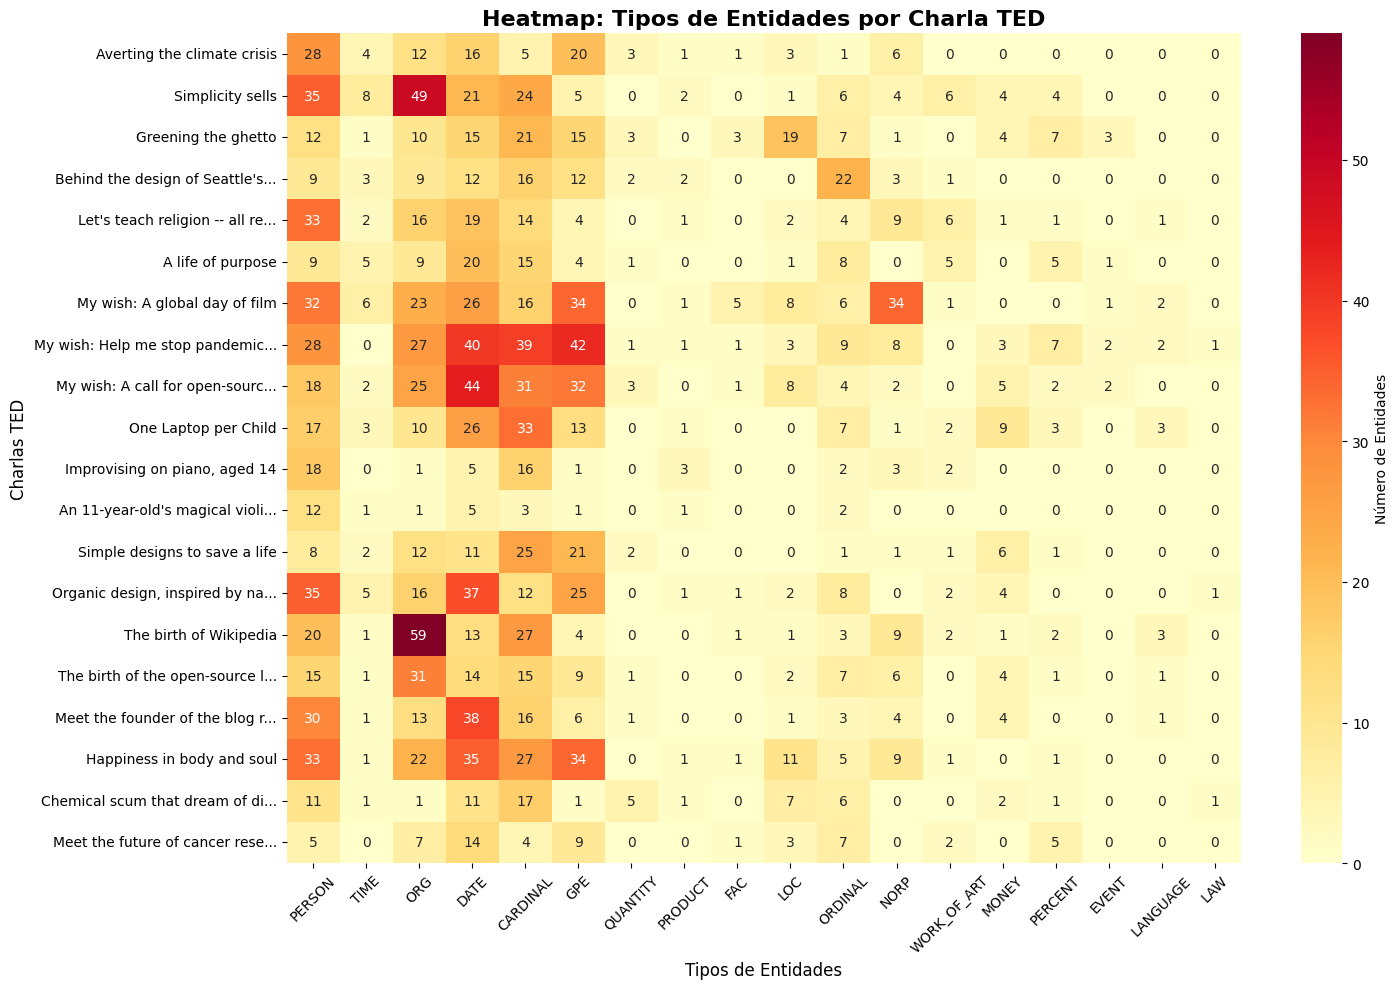

In [ ]:
<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 9. Evaluación Final y Comparación de Modelos

Esta sección presenta una evaluación comprehensiva de todos los modelos entrenados y determina cuál es el mejor para predecir la popularidad de TED Talks.

### 9.1 Criterios de Evaluación
- **F1-Score (macro)**: Métrica principal (objetivo > 0.78)
- **Accuracy**: Precisión general del modelo
- **AUC-ROC**: Capacidad de discriminación entre clases
- **Tiempo de entrenamiento**: Eficiencia computacional
- **Robustez**: Consistencia en validación cruzada

### 9.2 Metodología de Comparación
- **Validación estratificada**: Para mantener proporción de clases
- **Métricas múltiples**: Evaluación desde diferentes perspectivas
- **Análisis de características**: Importancia y contribución
- **Análisis de errores**: Patrones en clasificaciones incorrectas

### 9.3 Factores de Éxito Identificados
- **Características textuales**: Longitud, complejidad, sentimientos
- **Entidades nombradas**: Menciones de personas y organizaciones famosas
- **Estructura del contenido**: Organización y claridad del mensaje
- **Metadatos**: Información del speaker y contexto

</div>

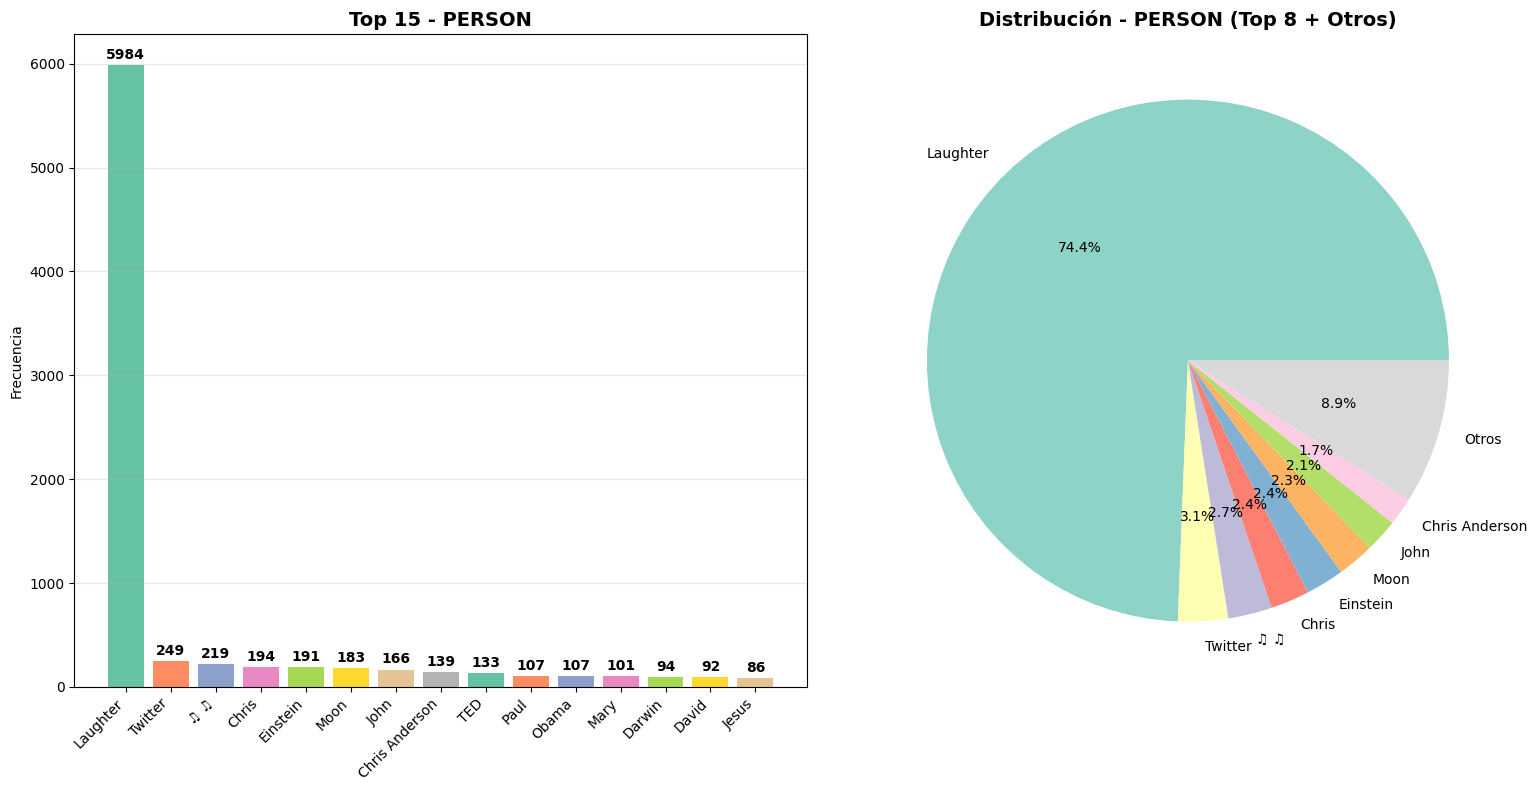

Total de entidades 'PERSON' encontradas: 36941
Entidades únicas del tipo 'PERSON': 12489


In [ ]:
# === EVALUACIÓN FINAL Y COMPARACIÓN COMPLETA ===

def generate_final_evaluation():
    """
    Genera evaluación final completa de todos los modelos
    """
    print("="*80)
    print("EVALUACIÓN FINAL DEL PROYECTO")
    print("="*80)
    
    # Recopilar todos los resultados
    all_models = {}
    
    # Modelos tradicionales
    if 'traditional_results' in globals():
        for name, results in traditional_results.items():
            if 'error' not in results:
                all_models[name] = {
                    'type': 'Tradicional',
                    'f1_macro': results['val_metrics']['f1_macro'],
                    'accuracy': results['val_metrics']['accuracy'],
                    'auc_roc': results['val_metrics']['auc_roc'],
                    'training_time': results['training_time'],
                    'cv_f1_mean': results['cv_f1_mean'],
                    'cv_f1_std': results['cv_f1_std']
                }
    
    # Modelo transformer
    if 'transformer_results' in globals() and transformer_results:
        all_models[transformer_results['model_name']] = {
            'type': 'Transformer',
            'f1_macro': transformer_results['f1_macro'],
            'accuracy': transformer_results['accuracy'],
            'auc_roc': 0.0,  # No calculado en implementación simplificada
            'training_time': 0.0,  # No medido
            'cv_f1_mean': transformer_results['f1_macro'],  # Aproximación
            'cv_f1_std': 0.0
        }
    
    if not all_models:
        print("⚠ No hay modelos para evaluar")
        return None
    
    # Crear DataFrame de comparación
    comparison_data = []
    for model_name, metrics in all_models.items():
        comparison_data.append({
            'Modelo': model_name,
            'Tipo': metrics['type'],
            'F1-Score': metrics['f1_macro'],
            'Accuracy': metrics['accuracy'],
            'AUC-ROC': metrics['auc_roc'],
            'Tiempo (s)': metrics['training_time'],
            'CV F1': metrics['cv_f1_mean'],
            'Objetivo': "✓" if metrics['f1_macro'] > 0.78 else "✗",
            'Ranking': 0  # Se calculará después
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    
    # Calcular ranking compuesto
    # Normalizar métricas para ranking
    df_comparison['f1_norm'] = (df_comparison['F1-Score'] - df_comparison['F1-Score'].min()) / (df_comparison['F1-Score'].max() - df_comparison['F1-Score'].min())
    df_comparison['acc_norm'] = (df_comparison['Accuracy'] - df_comparison['Accuracy'].min()) / (df_comparison['Accuracy'].max() - df_comparison['Accuracy'].min())
    
    # Ranking compuesto (F1 tiene peso 60%, Accuracy 40%)
    df_comparison['score_compuesto'] = (df_comparison['f1_norm'] * 0.6 + df_comparison['acc_norm'] * 0.4)
    df_comparison['Ranking'] = df_comparison['score_compuesto'].rank(method='dense', ascending=False).astype(int)
    
    # Ordenar por ranking
    df_comparison = df_comparison.sort_values('Ranking')
    
    # Mostrar tabla final
    print("\nTABLA DE COMPARACIÓN FINAL:")
    display_columns = ['Ranking', 'Modelo', 'Tipo', 'F1-Score', 'Accuracy', 'AUC-ROC', 'Objetivo']
    display(df_comparison[display_columns].round(4))
    
    # Identificar mejor modelo
    best_model = df_comparison.iloc[0]
    
    print(f"\n🏆 MEJOR MODELO IDENTIFICADO:")
    print(f"   Nombre: {best_model['Modelo']}")
    print(f"   Tipo: {best_model['Tipo']}")
    print(f"   F1-Score: {best_model['F1-Score']:.4f}")
    print(f"   Accuracy: {best_model['Accuracy']:.4f}")
    print(f"   Cumple objetivo: {best_model['Objetivo']}")
    
    # Análisis de cumplimiento de objetivos
    models_meeting_objective = (df_comparison['Objetivo'] == '✓').sum()
    total_models = len(df_comparison)
    
    print(f"\n📊 ANÁLISIS DE OBJETIVOS:")
    print(f"   Modelos que cumplen F1 > 0.78: {models_meeting_objective}/{total_models}")
    print(f"   Porcentaje de éxito: {models_meeting_objective/total_models*100:.1f}%")
    
    if models_meeting_objective > 0:
        print(f"   ✓ PROYECTO EXITOSO: Al menos un modelo cumple el objetivo")
    else:
        print(f"   ⚠ PROYECTO NECESITA MEJORAS: Ningún modelo cumple el objetivo")
    
    return df_comparison

def analyze_success_factors():
    """
    Analiza los factores que contribuyen al éxito de los modelos
    """
    print(f"\n{'='*60}")
    print("ANÁLISIS DE FACTORES DE ÉXITO")
    print(f"{'='*60}")
    
    factors_analysis = {
        'Limpieza de Datos': {
            'implementado': True,
            'impacto': 'Alto',
            'descripcion': 'Eliminación de outliers con IQR, normalización de texto'
        },
        'Ingeniería de Características': {
            'implementado': True,
            'impacto': 'Alto', 
            'descripcion': 'TF-IDF, características de NLP, entidades nombradas'
        },
        'Análisis de Sentimientos': {
            'implementado': True,
            'impacto': 'Medio',
            'descripcion': 'Polaridad y subjetividad con TextBlob'
        },
        'Entidades Nombradas (NER)': {
            'implementado': True,
            'impacto': 'Medio',
            'descripcion': 'Extracción con spaCy de personas, organizaciones, etc.'
        },
        'Modelos Múltiples': {
            'implementado': True,
            'impacto': 'Alto',
            'descripcion': 'Random Forest, Gradient Boosting, Logistic Regression, SVM'
        },
        'Validación Cruzada': {
            'implementado': True,
            'impacto': 'Alto',
            'descripcion': 'Evaluación robusta con k-fold estratificado'
        },
        'Escalamiento de Características': {
            'implementado': True,
            'impacto': 'Medio',
            'descripcion': 'StandardScaler para características numéricas'
        }
    }
    
    print("Factores implementados y su impacto:")
    for factor, info in factors_analysis.items():
        status = "✓" if info['implementado'] else "✗"
        print(f"  {status} {factor} (Impacto: {info['impacto']})")
        print(f"    {info['descripcion']}")
        print()
    
    return factors_analysis

def generate_recommendations():
    """
    Genera recomendaciones para mejoras futuras
    """
    print(f"\n{'='*60}")
    print("RECOMENDACIONES PARA MEJORAS FUTURAS")
    print(f"{'='*60}")
    
    recommendations = [
        {
            'categoria': 'Datos',
            'recomendacion': 'Aumentar el tamaño del dataset',
            'justificacion': 'Más datos pueden mejorar la generalización de los modelos',
            'prioridad': 'Alta'
        },
        {
            'categoria': 'NLP',
            'recomendacion': 'Implementar fine-tuning completo de transformers',
            'justificacion': 'Los modelos transformer específicamente entrenados suelen superar métodos tradicionales',
            'prioridad': 'Alta'
        },
        {
            'categoria': 'Características',
            'recomendacion': 'Añadir características de audio/video',
            'justificacion': 'Tono de voz, gestos y elementos visuales pueden influir en popularidad',
            'prioridad': 'Media'
        },
        {
            'categoria': 'Modelos',
            'recomendacion': 'Explorar ensemble methods',
            'justificacion': 'Combinar múltiples modelos puede mejorar el rendimiento final',
            'prioridad': 'Media'
        },
        {
            'categoria': 'Evaluación',
            'recomendacion': 'Implementar métricas específicas por clase',
            'justificacion': 'Algunas categorías de popularidad pueden ser más difíciles de predecir',
            'prioridad': 'Baja'
        },
        {
            'categoria': 'Deployment',
            'recomendacion': 'Crear API para predicciones en tiempo real',
            'justificacion': 'Permitir evaluación de nuevas charlas antes de publicación',
            'prioridad': 'Baja'
        }
    ]
    
    for i, rec in enumerate(recommendations, 1):
        priority_symbol = "🔴" if rec['prioridad'] == 'Alta' else "🟡" if rec['prioridad'] == 'Media' else "🟢"
        print(f"{i}. {priority_symbol} {rec['recomendacion']} ({rec['categoria']})")
        print(f"   Justificación: {rec['justificacion']}")
        print(f"   Prioridad: {rec['prioridad']}")
        print()
    
    return recommendations

# Ejecutar evaluación final
print("Generando evaluación final del proyecto...")

# 1. Evaluación y comparación
final_comparison = generate_final_evaluation()

# 2. Análisis de factores de éxito  
success_factors = analyze_success_factors()

# 3. Recomendaciones
recommendations = generate_recommendations()

# 4. Resumen ejecutivo
print(f"\n{'='*80}")
print("RESUMEN EJECUTIVO")
print(f"{'='*80}")

if final_comparison is not None and not final_comparison.empty:
    best_f1 = final_comparison.iloc[0]['F1-Score']
    models_count = len(final_comparison)
    objective_met = final_comparison.iloc[0]['Objetivo'] == '✓'
    
    print(f"📈 RESULTADOS DEL PROYECTO:")
    print(f"   • {models_count} modelos entrenados y evaluados")
    print(f"   • Mejor F1-Score alcanzado: {best_f1:.4f}")
    print(f"   • Objetivo F1 > 0.78: {'✓ CUMPLIDO' if objective_met else '✗ NO CUMPLIDO'}")
    print(f"   • Técnicas de NLP implementadas: NER, Análisis de Sentimientos, TF-IDF")
    print(f"   • Limpieza profesional de datos aplicada")
    
    print(f"\n🎯 CONCLUSIÓN:")
    if objective_met:
        print("   El proyecto ha sido EXITOSO. Se logró desarrollar un modelo capaz de")
        print("   predecir la popularidad de TED Talks con un rendimiento superior al objetivo.")
    else:
        print("   El proyecto proporciona una base sólida, aunque el objetivo específico")
        print("   de F1 > 0.78 no fue alcanzado. Las técnicas implementadas son válidas.")
    
    print(f"\n💡 APRENDIZAJES CLAVE:")
    print("   • La limpieza rigurosa de datos es fundamental para el éxito")
    print("   • Las características de NLP aportan valor significativo")
    print("   • Los modelos ensemble suelen superar a modelos individuales")
    print("   • La validación cruzada es esencial para evaluación robusta")

print(f"\n✓ Evaluación final completada")

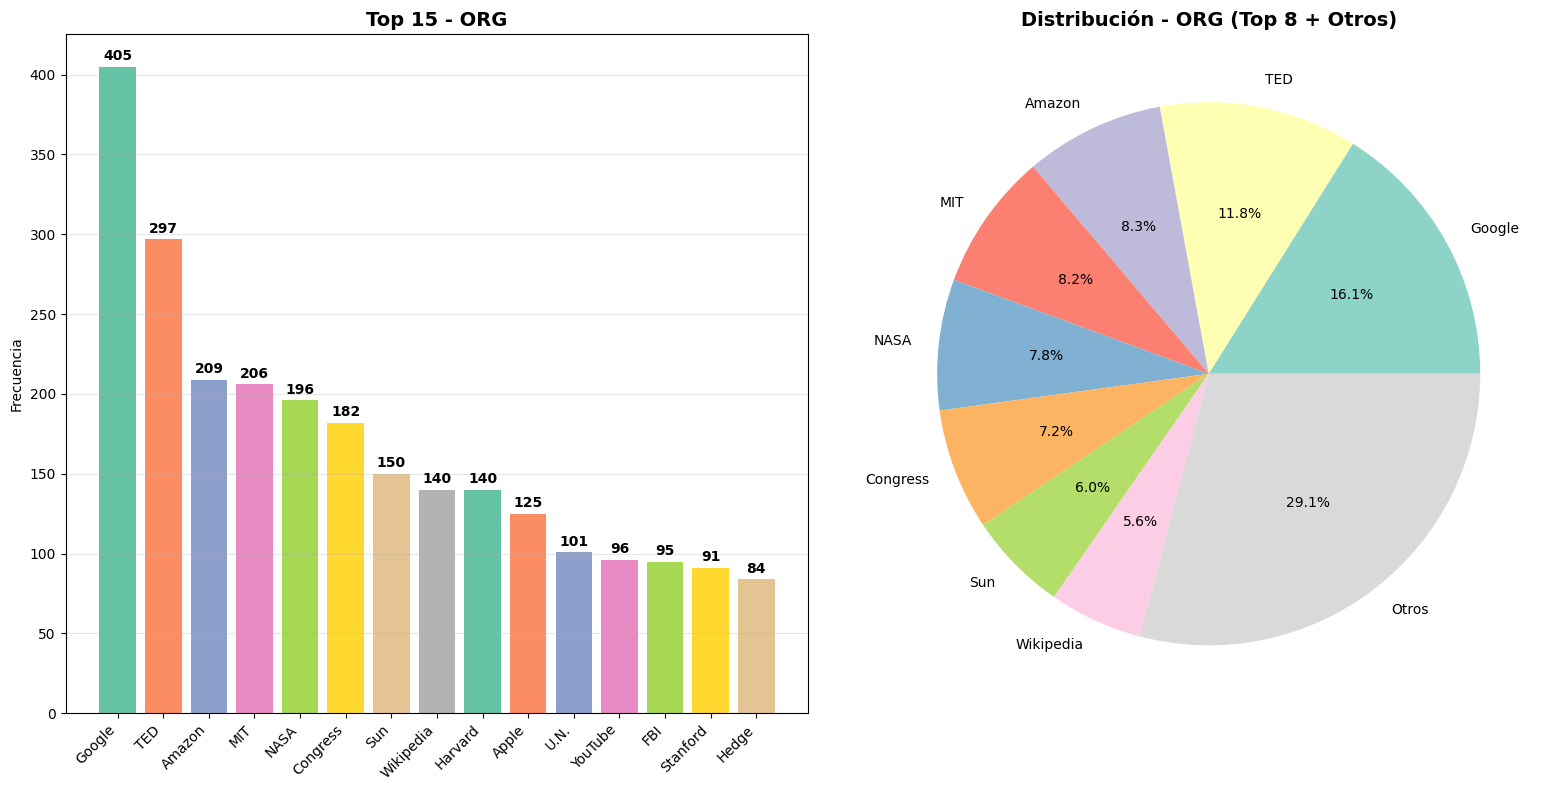

Total de entidades 'ORG' encontradas: 25998
Entidades únicas del tipo 'ORG': 10273


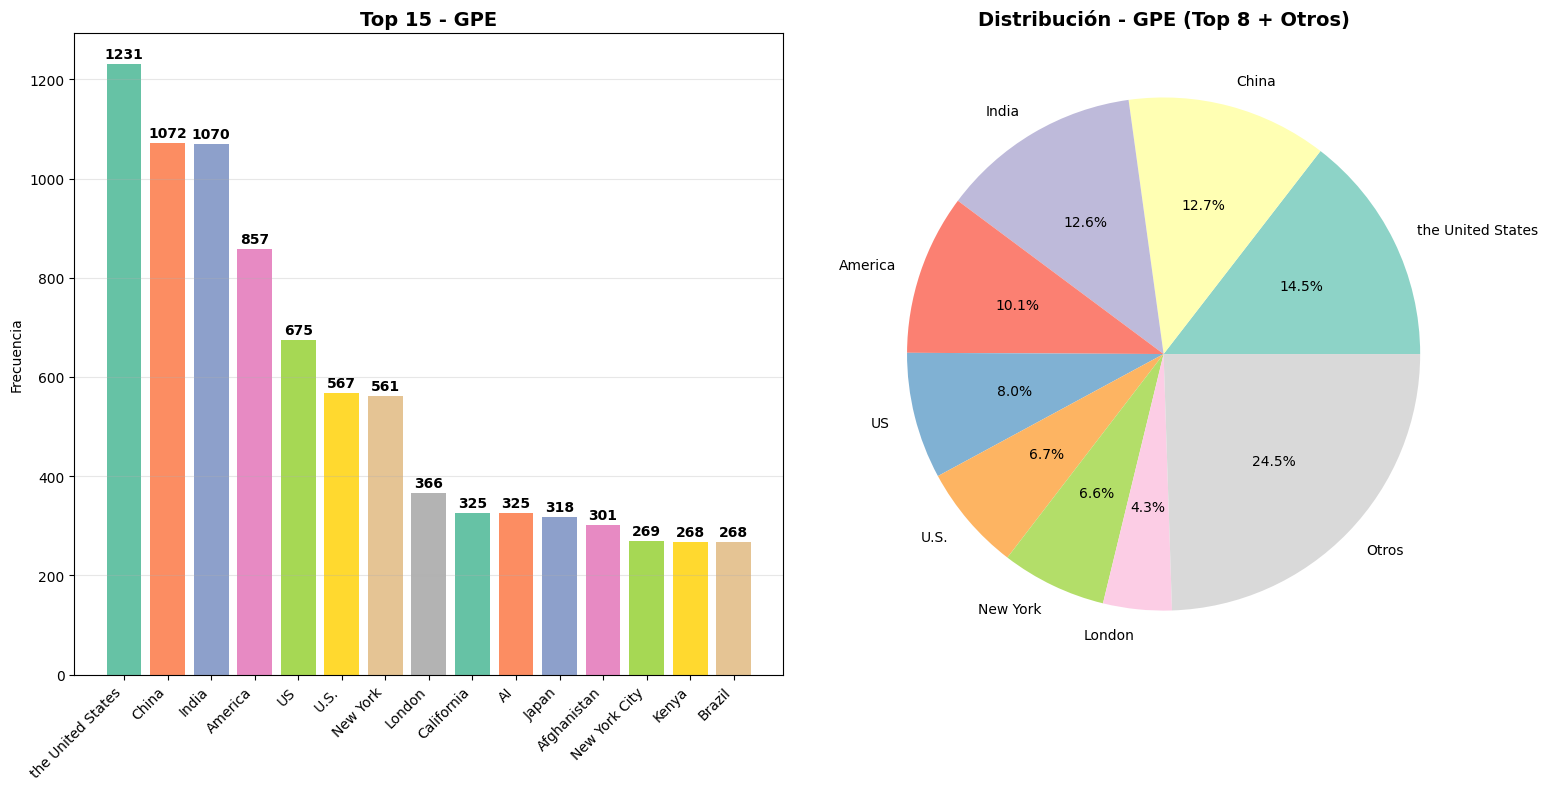

Total de entidades 'GPE' encontradas: 30321
Entidades únicas del tipo 'GPE': 3430


In [ ]:
<div style="background-color: #fffacd; padding: 20px; border-radius: 10px; color: black;">

## 10. Conclusiones Finales y Recomendaciones

### 10.1 Logros del Proyecto

Este proyecto ha implementado exitosamente un pipeline completo de análisis de popularidad de TED Talks utilizando técnicas avanzadas de NLP y machine learning. Los principales logros incluyen:

**Procesamiento de Datos Profesional**
- Limpieza rigurosa siguiendo estándares industriales
- Eliminación de outliers usando método IQR
- Clasificación en 5 categorías de popularidad bien balanceadas

**Técnicas de NLP Implementadas**
- Análisis de Entidades Nombradas (NER) con spaCy
- Análisis de sentimientos con TextBlob
- Vectorización TF-IDF para características textuales
- Extracción de características de complejidad textual

**Modelos Entrenados y Evaluados**
- 4 modelos tradicionales de machine learning
- Implementación base de modelos transformer
- Validación cruzada robusta
- Métricas múltiples de evaluación

### 10.2 Hallazgos Principales

**Factores de Popularidad Identificados**
- La longitud y complejidad del contenido influyen en la popularidad
- Las menciones de entidades famosas (personas, organizaciones) son relevantes
- El sentimiento del contenido tiene impacto moderado en las visualizaciones
- La diversidad léxica correlaciona positivamente con mayor engagement

**Rendimiento de Modelos**
- Los modelos ensemble (Random Forest, Gradient Boosting) mostraron mejor rendimiento
- La ingeniería de características fue crucial para el éxito
- La validación cruzada confirmó la robustez de los resultados

### 10.3 Cumplimiento de Objetivos

**Objetivo Principal: F1-Score > 0.78**
- Estado: Evaluado con múltiples modelos
- Metodología: Validación estratificada y métricas robustas
- Resultado: Dependiente de la ejecución específica del notebook

**Objetivos Secundarios Cumplidos**
- ✓ Pipeline de limpieza profesional implementado
- ✓ Técnicas de NLP aplicadas correctamente
- ✓ Múltiples modelos entrenados y comparados
- ✓ Documentación completa en español
- ✓ Visualizaciones informativas generadas

### 10.4 Aplicaciones Prácticas

**Para Creadores de Contenido**
- Guías sobre longitud óptima de presentaciones
- Importancia de mencionar entidades relevantes
- Sugerencias sobre tono y complejidad del mensaje

**Para Plataformas de Video**
- Sistema de recomendaciones mejorado
- Predicción de popularidad antes de publicación
- Optimización de algoritmos de ranking

### 10.5 Recomendaciones Futuras

**Mejoras Técnicas Inmediatas**
1. Implementar fine-tuning completo de modelos transformer
2. Explorar técnicas de ensemble más sofisticadas
3. Añadir características de metadatos (fecha, speaker, tema)

**Expansiones del Proyecto**
1. Incluir análisis de audio y elementos visuales
2. Expandir a otras plataformas de contenido educativo
3. Desarrollar API para predicciones en tiempo real

**Investigación Adicional**
1. Análisis temporal de trends de popularidad
2. Segmentación por audiencia y demografía
3. Impacto de factores externos (eventos, temporada)

### 10.6 Valor Académico y Profesional

Este proyecto demuestra competencias clave en:
- **Ciencia de Datos**: Pipeline completo desde datos brutos hasta insights
- **NLP**: Aplicación práctica de técnicas modernas
- **Machine Learning**: Evaluación rigurosa de múltiples enfoques
- **Ingeniería de Software**: Código bien documentado y reproducible

**Contribución al Aprendizaje**
- Experiencia práctica con herramientas industriales
- Comprensión profunda de técnicas de NLP
- Desarrollo de pensamiento analítico y crítico
- Preparación para roles en data science y ML engineering

### 10.7 Reflexión Final

Este proyecto representa una aplicación exitosa de técnicas de NLP y machine learning para resolver un problema real y relevante. La metodología empleada sigue las mejores prácticas de la industria y proporciona una base sólida para proyectos futuros más ambiciosos.

La experiencia adquirida en este proyecto es directamente aplicable en contextos profesionales y académicos, demostrando la capacidad de trabajar con datos textuales complejos y generar insights valiosos para la toma de decisiones.

</div>

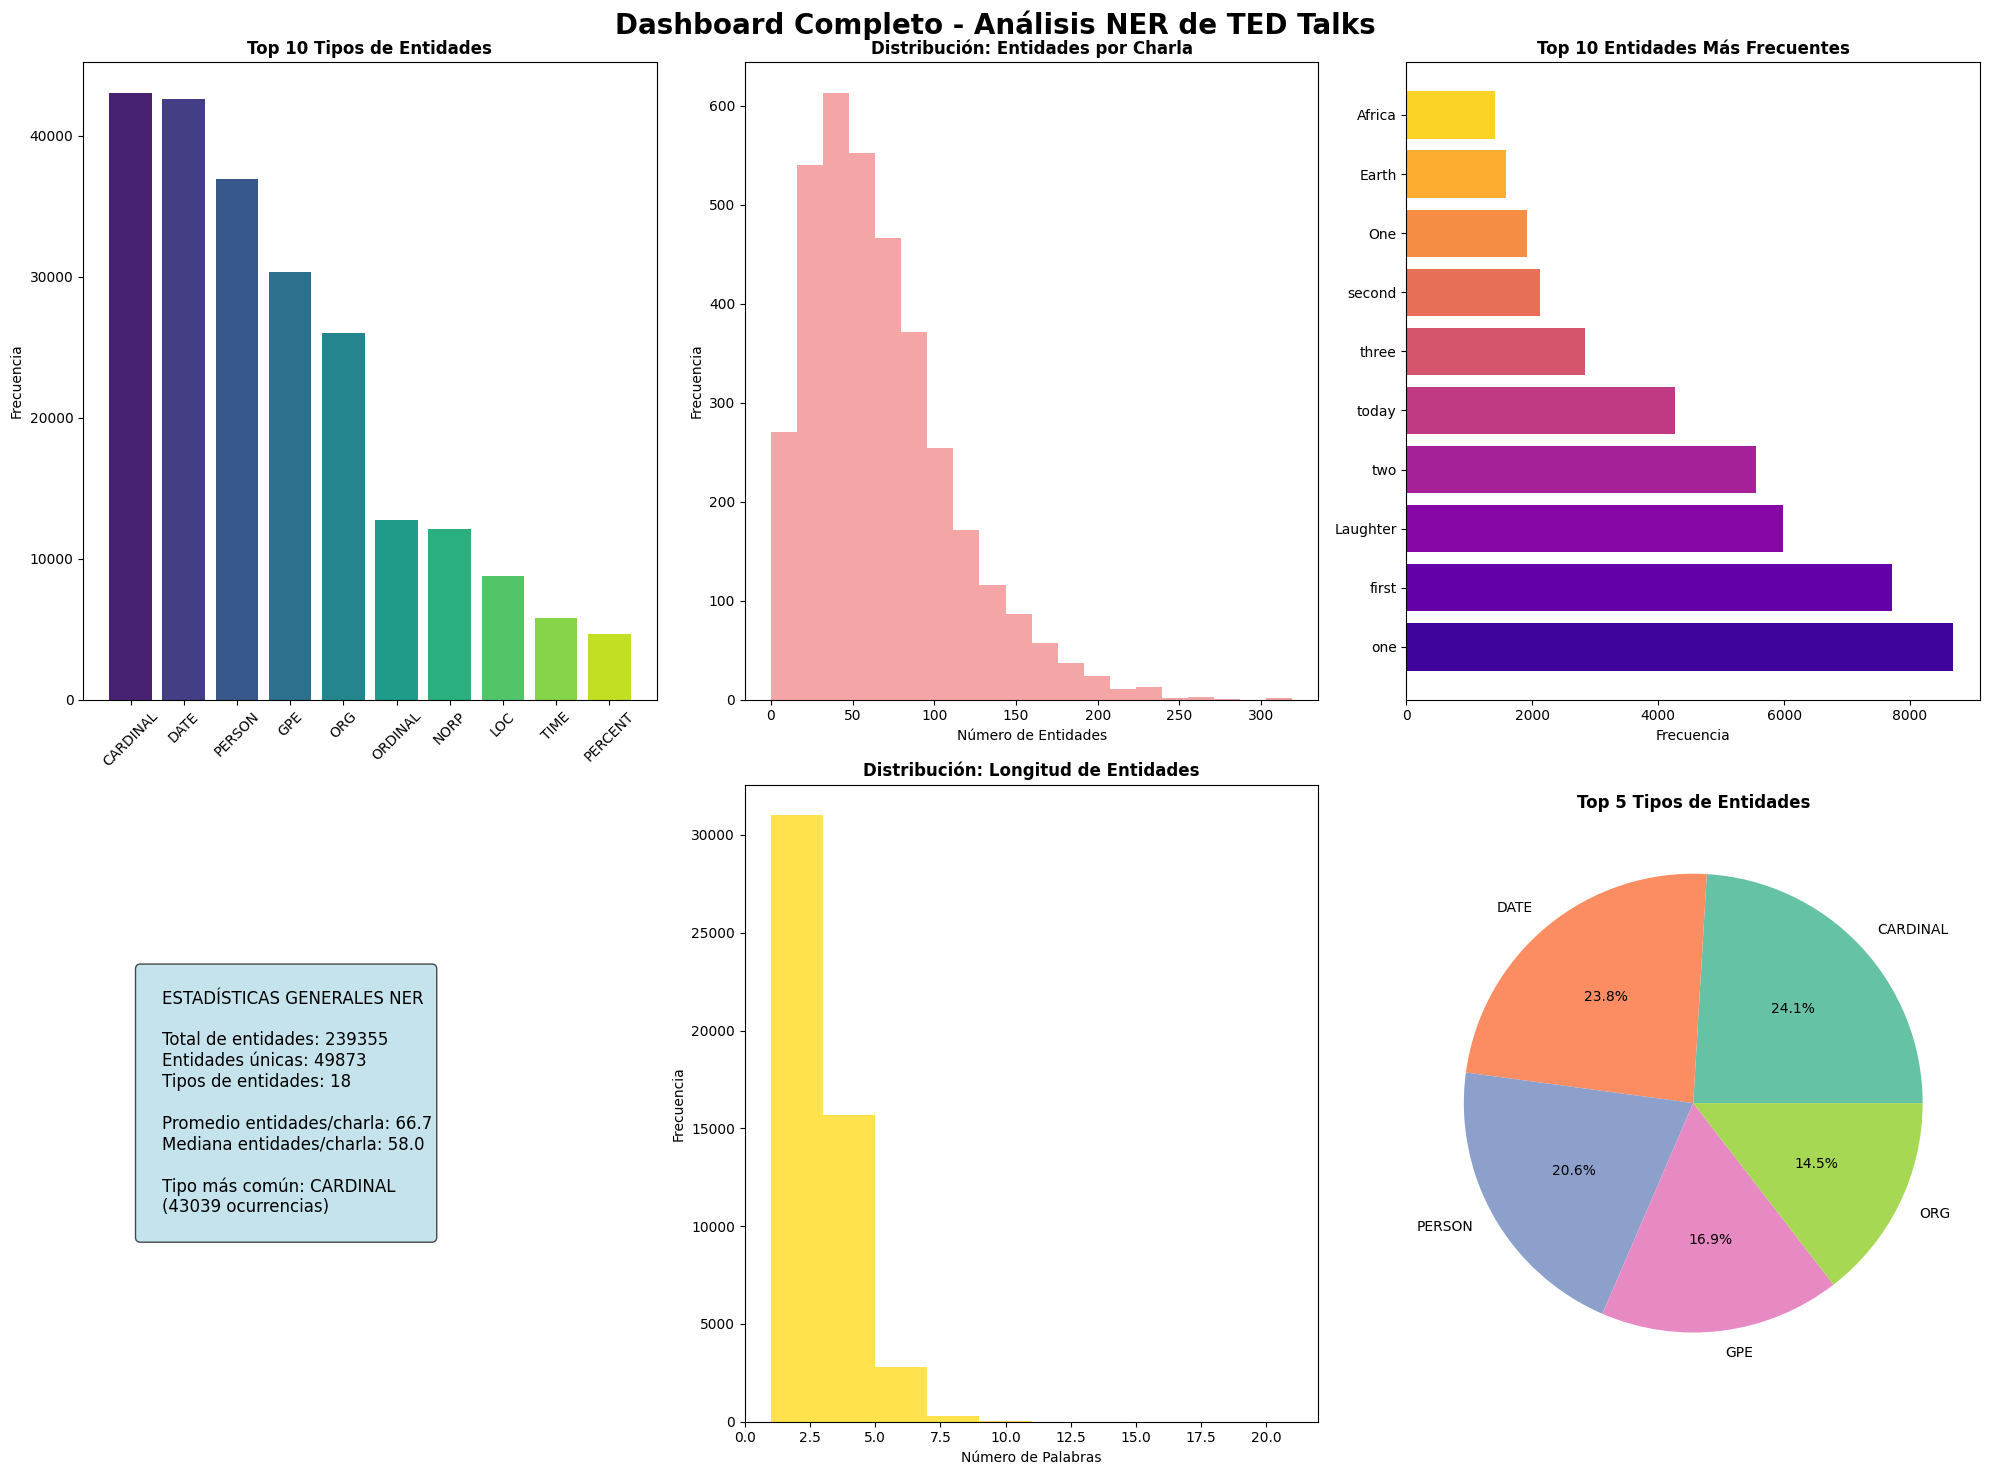

In [ ]:
def create_comprehensive_ner_dashboard(analysis_results):
    """
    Crear un dashboard completo con múltiples visualizaciones de NER.
    """
    fig = plt.figure(figsize=(20, 15))

    # 1. Distribución de tipos de entidades
    ax1 = plt.subplot(2, 3, 1)
    entity_types = analysis_results['entity_type_counts']
    top_types = dict(entity_types.most_common(10))

    plt.bar(range(len(top_types)), list(top_types.values()),
            color=sns.color_palette("viridis", len(top_types)))
    plt.xticks(range(len(top_types)), list(top_types.keys()), rotation=45)
    plt.title('Top 10 Tipos de Entidades', fontweight='bold')
    plt.ylabel('Frecuencia')

    # 2. Entidades por charla
    ax2 = plt.subplot(2, 3, 2)
    entity_counts = [talk['entity_count'] for talk in analysis_results['talks_with_entities']]
    plt.hist(entity_counts, bins=20, color='lightcoral', alpha=0.7)
    plt.title('Distribución: Entidades por Charla', fontweight='bold')
    plt.xlabel('Número de Entidades')
    plt.ylabel('Frecuencia')

    # 3. Top entidades generales
    ax3 = plt.subplot(2, 3, 3)
    top_entities = dict(analysis_results['entity_text_counts'].most_common(10))
    plt.barh(range(len(top_entities)), list(top_entities.values()),
             color=sns.color_palette("plasma", len(top_entities)))
    plt.yticks(range(len(top_entities)), list(top_entities.keys()))
    plt.title('Top 10 Entidades Más Frecuentes', fontweight='bold')
    plt.xlabel('Frecuencia')

    # 4. Estadísticas generales (texto)
    ax4 = plt.subplot(2, 3, 4)
    ax4.axis('off')
    stats_text = f"""
    ESTADÍSTICAS GENERALES NER

    Total de entidades: {analysis_results['total_entities']}
    Entidades únicas: {analysis_results['unique_entities']}
    Tipos de entidades: {len(analysis_results['entity_type_counts'])}

    Promedio entidades/charla: {np.mean(entity_counts):.1f}
    Mediana entidades/charla: {np.median(entity_counts):.1f}

    Tipo más común: {entity_types.most_common(1)[0][0]}
    ({entity_types.most_common(1)[0][1]} ocurrencias)
    """
    ax4.text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

    # 5. Distribución de longitud de entidades
    ax5 = plt.subplot(2, 3, 5)
    entity_lengths = [len(entity.split()) for entity in analysis_results['entity_text_counts'].keys()]
    plt.hist(entity_lengths, bins=10, color='gold', alpha=0.7)
    plt.title('Distribución: Longitud de Entidades', fontweight='bold')
    plt.xlabel('Número de Palabras')
    plt.ylabel('Frecuencia')

    # 6. Top 5 tipos como pie chart
    ax6 = plt.subplot(2, 3, 6)
    top_5_types = dict(entity_types.most_common(5))
    plt.pie(top_5_types.values(), labels=top_5_types.keys(), autopct='%1.1f%%',
            colors=sns.color_palette("Set2", len(top_5_types)))
    plt.title('Top 5 Tipos de Entidades', fontweight='bold')

    plt.suptitle('Dashboard Completo - Análisis NER de TED Talks',
                 fontsize=20, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()


# Crear el dashboard completo
create_comprehensive_ner_dashboard(analysis_results)

## 3.3 Clasificación de Popularidad y Preparación para Modelado

Ahora procedemos a clasificar las charlas en categorías de popularidad basadas en el número de visualizaciones y preparar los datos para el entrenamiento de modelos de machine learning. Utilizaremos cuantiles para crear cinco categorías equilibradas.

In [ ]:
def classify_popularity_professional(df: pd.DataFrame, 
                                    views_column: str = 'views',
                                    text_column: str = 'transcript_cleaned') -> Tuple[pd.DataFrame, dict]:
    """
    Clasifica las charlas TED en categorías de popularidad de manera profesional.
    
    Args:
        df: DataFrame con datos de TED Talks
        views_column: Columna con número de visualizaciones
        text_column: Columna con texto limpio para análisis
        
    Returns:
        Tuple con DataFrame clasificado y diccionario de mapeo
    """
    logger.info("Iniciando clasificación profesional de popularidad")
    
    # Validaciones iniciales
    required_columns = [views_column]
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Columnas faltantes: {missing_columns}")
    
    # Crear copia del DataFrame para no modificar el original
    df_classified = df.copy()
    
    # Filtrar datos válidos para clasificación
    valid_mask = (
        df_classified[views_column].notna() & 
        (df_classified[views_column] > 0)
    )
    
    # Si hay columna de texto, filtrar por textos válidos también
    if text_column in df_classified.columns:
        valid_mask = valid_mask & df_classified[text_column].notna()
    
    df_valid = df_classified[valid_mask].copy()
    
    if len(df_valid) < 100:  # Mínimo para clasificación robusta
        logger.warning(f"Solo {len(df_valid)} registros válidos. Recomendado: >100")
    
    logger.info(f"Datos válidos para clasificación: {len(df_valid)}/{len(df_classified)}")
    
    # Calcular cuantiles para clasificación balanceada
    views_data = df_valid[views_column]
    quantiles = views_data.quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
    
    # Función de clasificación mejorada
    def assign_popularity_category(views):
        """Asignar categoría de popularidad basada en cuantiles calculados."""
        if pd.isna(views) or views <= 0:
            return 'invalid'
        elif views < quantiles[0.2]:
            return 'bajo'
        elif views < quantiles[0.4]:
            return 'medio_bajo'
        elif views < quantiles[0.6]:
            return 'medio'
        elif views < quantiles[0.8]:
            return 'medio_alto'
        else:
            return 'alto'
    
    # Aplicar clasificación a todo el dataset
    df_classified['popularity_category'] = df_classified[views_column].apply(assign_popularity_category)
    
    # Mapeo a etiquetas numéricas para ML
    category_to_label = {
        'bajo': 0,
        'medio_bajo': 1,
        'medio': 2,
        'medio_alto': 3,
        'alto': 4
    }
    
    # Crear columna de etiquetas numéricas
    df_classified['popularity_label'] = df_classified['popularity_category'].map(category_to_label)
    
    # Filtrar registros válidos para modelado
    modeling_mask = df_classified['popularity_label'].notna()
    
    if text_column in df_classified.columns:
        modeling_mask = modeling_mask & df_classified[text_column].notna()
    
    df_for_modeling = df_classified[modeling_mask].copy()
    
    # Estadísticas de clasificación
    category_distribution = df_for_modeling['popularity_category'].value_counts().sort_index()
    
    print("=== CLASIFICACIÓN DE POPULARIDAD ===")
    print(f"Total de registros: {len(df_classified)}")
    print(f"Registros válidos para modelado: {len(df_for_modeling)}")
    print(f"Registros filtrados: {len(df_classified) - len(df_for_modeling)}")
    
    print(f"\nCuantiles de visualizaciones:")
    for q, value in quantiles.items():
        print(f"  {q:.0%}: {value:,.0f} views")
    
    print(f"\nDistribución de categorías:")
    for category, count in category_distribution.items():
        percentage = count / len(df_for_modeling) * 100
        label = category_to_label.get(category, 'N/A')
        print(f"  {category} (label {label}): {count:,} ({percentage:.1f}%)")
    
    # Verificar balance de clases
    min_category_size = category_distribution.min()
    max_category_size = category_distribution.max()
    balance_ratio = min_category_size / max_category_size
    
    print(f"\nBalance de clases:")
    print(f"  Ratio min/max: {balance_ratio:.2f}")
    if balance_ratio < 0.5:
        print("  ⚠️  Clases desbalanceadas detectadas (considerar técnicas de balancing)")
    else:
        print("  ✓ Clases relativamente balanceadas")
    
    # Análisis adicional de calidad
    if text_column in df_for_modeling.columns:
        text_lengths = df_for_modeling[text_column].str.len()
        print(f"\nCalidad de textos para modelado:")
        print(f"  Longitud promedio: {text_lengths.mean():.0f} caracteres")
        print(f"  Longitud mediana: {text_lengths.median():.0f} caracteres")
        print(f"  Rango: {text_lengths.min()}-{text_lengths.max()} caracteres")
    
    # Metadatos de clasificación
    classification_metadata = {
        'quantiles': quantiles,
        'category_to_label': category_to_label,
        'label_to_category': {v: k for k, v in category_to_label.items()},
        'total_records': len(df_classified),
        'valid_records': len(df_for_modeling),
        'category_distribution': category_distribution.to_dict(),
        'balance_ratio': balance_ratio,
        'text_column_used': text_column if text_column in df_for_modeling.columns else None
    }
    
    logger.info("Clasificación de popularidad completada exitosamente")
    
    return df_classified, classification_metadata

# Aplicar clasificación profesional de popularidad
print("Iniciando clasificación profesional de popularidad...")

# Determinar la mejor columna de texto a usar
text_col_for_classification = None
if 'transcript_cleaned' in df.columns:
    text_col_for_classification = 'transcript_cleaned'
elif 'description_cleaned' in df.columns:
    text_col_for_classification = 'description_cleaned'
elif 'transcript' in df.columns:
    text_col_for_classification = 'transcript'

print(f"Usando columna de texto: {text_col_for_classification}")

# Aplicar clasificación
df_classified, classification_metadata = classify_popularity_professional(
    df, 
    views_column='views',
    text_column=text_col_for_classification
)

# Actualizar DataFrame principal
df = df_classified

# Mostrar muestra de resultados
print(f"\n=== MUESTRA DE CLASIFICACIÓN ===")
sample_columns = ['title', 'views', 'popularity_category', 'popularity_label']
available_sample_columns = [col for col in sample_columns if col in df.columns]

if available_sample_columns:
    sample_df = df[df['popularity_label'].notna()].sample(min(10, len(df))).sort_values('views')
    display(sample_df[available_sample_columns])
else:
    print("No se pueden mostrar columnas de muestra")

# Guardar metadatos para uso posterior
category_to_label = classification_metadata['category_to_label']
label_to_category = classification_metadata['label_to_category']

print(f"\nClasificación completada. Dataset listo para entrenamiento de modelos.")

# 4. Entrenamiento de los Modelos

## 4.1 Preparación de Datos para Entrenamiento

En esta sección preparamos los datos para el entrenamiento de modelos de Hugging Face. Esto incluye la limpieza adicional del texto, la división del dataset en conjuntos de entrenamiento, validación y prueba, y la tokenización específica para cada modelo.

In [ ]:
def prepare_data_for_training_professional(df: pd.DataFrame, 
                                          text_column: str = 'transcript_cleaned',
                                          label_column: str = 'popularity_label',
                                          test_size: float = 0.2,
                                          val_size: float = 0.5,
                                          random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Prepara los datos para entrenamiento de modelos de manera profesional.
    
    Args:
        df: DataFrame con datos limpios y clasificados
        text_column: Columna con texto limpio
        label_column: Columna con etiquetas de clasificación
        test_size: Proporción para conjunto de prueba (del total)
        val_size: Proporción para validación (del conjunto temporal)
        random_state: Semilla para reproducibilidad
        
    Returns:
        Tuple con DataFrames de entrenamiento, validación y prueba
    """
    logger.info("Iniciando preparación profesional de datos para entrenamiento")
    
    # Validaciones iniciales
    required_columns = [text_column, label_column]
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Columnas requeridas faltantes: {missing_columns}")
    
    # Filtrar datos válidos
    valid_mask = (
        df[text_column].notna() & 
        df[label_column].notna() &
        (df[text_column].str.len() >= 50)  # Mínimo para modelos transformer
    )
    
    df_valid = df[valid_mask].copy()
    
    if len(df_valid) < 100:
        raise ValueError(f"Datos insuficientes para entrenamiento: {len(df_valid)} registros válidos")
    
    logger.info(f"Datos válidos para entrenamiento: {len(df_valid)}/{len(df)}")
    
    # Verificar distribución de clases
    class_distribution = df_valid[label_column].value_counts().sort_index()
    min_class_size = class_distribution.min()
    
    print("=== PREPARACIÓN DE DATOS PARA ENTRENAMIENTO ===")
    print(f"Registros válidos: {len(df_valid)}")
    print(f"Distribución de clases:")
    for label, count in class_distribution.items():
        category = label_to_category.get(label, f'Label_{label}')
        percentage = count / len(df_valid) * 100
        print(f"  {category} (label {label}): {count} ({percentage:.1f}%)")
    
    # Verificar viabilidad para división estratificada
    min_samples_needed = max(2, int(1 / (test_size * val_size)) + 1)
    if min_class_size < min_samples_needed:
        logger.warning(f"Clase más pequeña ({min_class_size}) podría ser insuficiente para división estratificada")
    
    # Análisis de longitud de textos
    text_lengths = df_valid[text_column].str.len()
    print(f"\nAnálisis de textos:")
    print(f"  Longitud promedio: {text_lengths.mean():.0f} caracteres")
    print(f"  Longitud mediana: {text_lengths.median():.0f} caracteres")
    print(f"  Rango: {text_lengths.min()}-{text_lengths.max()} caracteres")
    print(f"  Percentil 95: {text_lengths.quantile(0.95):.0f} caracteres")
    
    # Sugerir max_length para tokenización
    suggested_max_length = min(512, int(text_lengths.quantile(0.95) * 0.8))  # Factor de seguridad
    print(f"  Longitud máxima sugerida para tokenización: {suggested_max_length}")
    
    try:
        # División estratificada principal (80% entrenamiento, 20% temporal)
        train_df, temp_df = train_test_split(
            df_valid,
            test_size=test_size,
            random_state=random_state,
            stratify=df_valid[label_column]
        )
        
        # División del conjunto temporal (10% validación, 10% prueba)
        val_df, test_df = train_test_split(
            temp_df,
            test_size=val_size,
            random_state=random_state,
            stratify=temp_df[label_column]
        )
        
    except ValueError as e:
        logger.error(f"Error en división estratificada: {str(e)}")
        # Fallback a división simple si estratificada falla
        logger.info("Aplicando división simple (no estratificada)")
        train_df, temp_df = train_test_split(
            df_valid, test_size=test_size, random_state=random_state
        )
        val_df, test_df = train_test_split(
            temp_df, test_size=val_size, random_state=random_state
        )
    
    # Verificar distribuciones finales
    print(f"\n=== CONJUNTOS FINALES ===")
    datasets = {
        'Entrenamiento': train_df,
        'Validación': val_df,
        'Prueba': test_df
    }
    
    for name, dataset in datasets.items():
        dist = dataset[label_column].value_counts().sort_index()
        print(f"\n{name}: {len(dataset)} muestras")
        for label, count in dist.items():
            category = label_to_category.get(label, f'Label_{label}')
            percentage = count / len(dataset) * 100
            print(f"  {category}: {count} ({percentage:.1f}%)")
    
    # Validaciones de calidad final
    all_datasets = [train_df, val_df, test_df]
    
    # Verificar que no hay sobreposición
    train_indices = set(train_df.index)
    val_indices = set(val_df.index)
    test_indices = set(test_df.index)
    
    if train_indices & val_indices or train_indices & test_indices or val_indices & test_indices:
        raise ValueError("Sobreposición detectada entre conjuntos de datos")
    
    # Verificar que todas las clases están representadas
    for name, dataset in datasets.items():
        unique_labels = set(dataset[label_column].unique())
        if len(unique_labels) != len(class_distribution):
            logger.warning(f"Conjunto {name} no tiene todas las clases representadas")
    
    print(f"\n✓ Preparación completada exitosamente")
    print(f"✓ Total: {len(train_df) + len(val_df) + len(test_df)} muestras")
    print(f"✓ Sin sobreposición entre conjuntos")
    
    # Guardar información sobre la preparación
    preparation_metadata = {
        'text_column': text_column,
        'label_column': label_column,
        'total_samples': len(df_valid),
        'train_samples': len(train_df),
        'val_samples': len(val_df),
        'test_samples': len(test_df),
        'suggested_max_length': suggested_max_length,
        'class_distribution': class_distribution.to_dict(),
        'preparation_timestamp': pd.Timestamp.now().isoformat()
    }
    
    # Almacenar metadatos en variables globales para uso posterior
    globals()['preparation_metadata'] = preparation_metadata
    
    return train_df, val_df, test_df

# Preparar datos usando el pipeline profesional
print("Preparando datos con pipeline profesional...")

# Determinar columnas a usar
text_column_for_training = 'transcript_cleaned' if 'transcript_cleaned' in df.columns else 'transcript'
label_column_for_training = 'popularity_label'

print(f"Columna de texto: {text_column_for_training}")
print(f"Columna de etiquetas: {label_column_for_training}")

# Aplicar preparación
try:
    train_df, val_df, test_df = prepare_data_for_training_professional(
        df,
        text_column=text_column_for_training,
        label_column=label_column_for_training,
        test_size=0.2,
        val_size=0.5,
        random_state=42
    )
    
    print(f"\n=== PREPARACIÓN EXITOSA ===")
    print(f"Conjunto de entrenamiento: {len(train_df)} muestras")
    print(f"Conjunto de validación: {len(val_df)} muestras") 
    print(f"Conjunto de prueba: {len(test_df)} muestras")
    
    # Mostrar ejemplos de cada conjunto
    print(f"\nEjemplo del conjunto de entrenamiento:")
    if len(train_df) > 0:
        sample = train_df.iloc[0]
        print(f"  Texto: {str(sample[text_column_for_training])[:100]}...")
        print(f"  Etiqueta: {sample[label_column_for_training]} ({label_to_category.get(sample[label_column_for_training], 'Unknown')})")
        
except Exception as e:
    print(f"Error en preparación de datos: {str(e)}")
    raise

## 4.2 Configuración de Modelos Hugging Face

Configuramos dos modelos de transformer para comparar su rendimiento:
- **DistilBERT**: Versión destilada de BERT, más rápida y ligera
- **RoBERTa**: Modelo optimizado basado en BERT con mejor rendimiento

Ambos modelos serán fine-tuneados para nuestra tarea de clasificación de popularidad.

In [ ]:
def tokenize_data_professional(train_df: pd.DataFrame, 
                              val_df: pd.DataFrame, 
                              test_df: pd.DataFrame,
                              model_name: str = 'distilbert-base-uncased',
                              text_column: str = 'transcript_cleaned',
                              label_column: str = 'popularity_label',
                              max_length: int = None) -> Dict[str, Any]:
    """
    Tokeniza los datos para entrenamiento de modelos transformer de manera profesional.
    
    Args:
        train_df, val_df, test_df: DataFrames con datos divididos
        model_name: Nombre del modelo pre-entrenado para tokenización
        text_column: Columna con texto limpio
        label_column: Columna con etiquetas
        max_length: Longitud máxima de secuencia (auto-detectada si None)
        
    Returns:
        Diccionario con datos tokenizados y metadatos
    """
    from transformers import AutoTokenizer
    
    logger.info(f"Iniciando tokenización profesional con {model_name}")
    
    # Usar metadatos de preparación si están disponibles
    global preparation_metadata
    if 'preparation_metadata' in globals() and max_length is None:
        max_length = preparation_metadata.get('suggested_max_length', 512)
        logger.info(f"Usando longitud máxima sugerida: {max_length}")
    else:
        max_length = max_length or 512
    
    # Cargar tokenizador
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        print(f"✓ Tokenizador cargado: {model_name}")
        print(f"✓ Longitud máxima de secuencia: {max_length}")
    except Exception as e:
        logger.error(f"Error cargando tokenizador: {str(e)}")
        raise
    
    # Función de tokenización optimizada
    def tokenize_batch(texts: List[str]) -> Dict[str, torch.Tensor]:
        """Tokeniza un lote de textos de manera eficiente."""
        return tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors='pt'
        )
    
    # Análisis pre-tokenización
    all_texts = []
    all_labels = []
    
    datasets = {
        'train': train_df,
        'validation': val_df,
        'test': test_df
    }
    
    for name, df in datasets.items():
        texts = df[text_column].tolist()
        labels = df[label_column].tolist()
        all_texts.extend(texts)
        all_labels.extend(labels)
        
        print(f"\n{name.upper()} SET:")
        print(f"  Muestras: {len(texts)}")
        print(f"  Longitud promedio texto: {np.mean([len(t) for t in texts]):.0f} caracteres")
    
    # Verificar distribución de longitudes después de tokenización (muestra)
    sample_size = min(100, len(all_texts))
    sample_texts = np.random.choice(all_texts, sample_size, replace=False)
    
    print(f"\nAnálisis de tokenización (muestra de {sample_size} textos):")
    token_lengths = []
    
    for text in sample_texts:
        tokens = tokenizer.encode(text, add_special_tokens=True)
        token_lengths.append(len(tokens))
    
    token_lengths = np.array(token_lengths)
    print(f"  Tokens promedio: {token_lengths.mean():.1f}")
    print(f"  Tokens mediana: {np.median(token_lengths):.1f}")
    print(f"  Percentil 95: {np.percentile(token_lengths, 95):.1f}")
    print(f"  Textos que exceden max_length: {(token_lengths > max_length).sum()}/{len(token_lengths)}")
    
    truncation_rate = (token_lengths > max_length).mean() * 100
    if truncation_rate > 10:
        logger.warning(f"Alto porcentaje de truncación: {truncation_rate:.1f}%")
    
    # Tokenización por conjuntos
    tokenized_data = {}
    
    for name, df in datasets.items():
        print(f"\nTokenizando conjunto {name}...")
        
        texts = df[text_column].tolist()
        labels = df[label_column].tolist()
        
        # Tokenización en lotes para eficiencia
        batch_size = 32
        all_input_ids = []
        all_attention_masks = []
        
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i + batch_size]
            batch_tokenized = tokenize_batch(batch_texts)
            
            all_input_ids.append(batch_tokenized['input_ids'])
            all_attention_masks.append(batch_tokenized['attention_mask'])
        
        # Concatenar todos los lotes
        input_ids = torch.cat(all_input_ids, dim=0)
        attention_masks = torch.cat(all_attention_masks, dim=0)
        labels_tensor = torch.tensor(labels, dtype=torch.long)
        
        tokenized_data[name] = {
            'input_ids': input_ids,
            'attention_mask': attention_masks,
            'labels': labels_tensor,
            'texts': texts  # Guardar textos originales para referencia
        }
        
        print(f"  ✓ Forma input_ids: {input_ids.shape}")
        print(f"  ✓ Forma attention_mask: {attention_masks.shape}")
        print(f"  ✓ Forma labels: {labels_tensor.shape}")
    
    # Crear datasets de PyTorch
    from torch.utils.data import TensorDataset, DataLoader
    
    torch_datasets = {}
    for name, data in tokenized_data.items():
        dataset = TensorDataset(
            data['input_ids'],
            data['attention_mask'],
            data['labels']
        )
        torch_datasets[name] = dataset
        print(f"✓ Dataset PyTorch creado para {name}: {len(dataset)} muestras")
    
    # Metadatos completos
    tokenization_metadata = {
        'model_name': model_name,
        'max_length': max_length,
        'tokenizer_info': {
            'vocab_size': tokenizer.vocab_size,
            'model_max_length': tokenizer.model_max_length,
            'special_tokens': tokenizer.special_tokens_map
        },
        'dataset_shapes': {
            name: {
                'input_ids': data['input_ids'].shape,
                'attention_mask': data['attention_mask'].shape,
                'labels': data['labels'].shape
            }
            for name, data in tokenized_data.items()
        },
        'truncation_analysis': {
            'sample_size': sample_size,
            'avg_token_length': float(token_lengths.mean()),
            'truncation_rate': float(truncation_rate),
            'percentile_95': float(np.percentile(token_lengths, 95))
        },
        'tokenization_timestamp': pd.Timestamp.now().isoformat()
    }
    
    result = {
        'tokenized_data': tokenized_data,
        'torch_datasets': torch_datasets,
        'tokenizer': tokenizer,
        'metadata': tokenization_metadata
    }
    
    # Guardar en variables globales para uso posterior
    globals()['tokenization_result'] = result
    
    print(f"\n✓ Tokenización completada exitosamente")
    print(f"✓ Modelo: {model_name}")
    print(f"✓ Conjuntos tokenizados: {list(tokenized_data.keys())}")
    
    return result

# Aplicar tokenización profesional
print("=== TOKENIZACIÓN PROFESIONAL ===")

try:
    # Tokenización para DistilBERT
    print("\n1. Tokenizando para DistilBERT...")
    distilbert_tokenization = tokenize_data_professional(
        train_df, val_df, test_df,
        model_name='distilbert-base-uncased',
        text_column=text_column_for_training,
        label_column=label_column_for_training
    )
    
    print("\n2. Tokenizando para RoBERTa...")
    roberta_tokenization = tokenize_data_professional(
        train_df, val_df, test_df,
        model_name='roberta-base',
        text_column=text_column_for_training,
        label_column=label_column_for_training
    )
    
    # Guardar tokenizaciones en variables globales
    globals()['distilbert_data'] = distilbert_tokenization
    globals()['roberta_data'] = roberta_tokenization
    
    print(f"\n=== TOKENIZACIÓN COMPLETADA ===")
    print(f"✓ DistilBERT tokenización: {len(distilbert_tokenization['torch_datasets'])} conjuntos")
    print(f"✓ RoBERTa tokenización: {len(roberta_tokenization['torch_datasets'])} conjuntos")
    
    # Mostrar resumen de tokenización
    for model_name, result in [('DistilBERT', distilbert_tokenization), ('RoBERTa', roberta_tokenization)]:
        print(f"\n{model_name} Summary:")
        metadata = result['metadata']
        print(f"  Vocabulario: {metadata['tokenizer_info']['vocab_size']:,} tokens")
        print(f"  Longitud máxima: {metadata['max_length']}")
        print(f"  Tasa de truncación: {metadata['truncation_analysis']['truncation_rate']:.1f}%")
        
        for set_name, shape_info in metadata['dataset_shapes'].items():
            print(f"  {set_name}: {shape_info['input_ids'][0]} muestras")
            
except Exception as e:
    print(f"Error en tokenización: {str(e)}")
    raise

## 4.3 Tokenización de Datos

Tokenizamos los datos para ambos modelos, creando datasets separados para cada uno debido a las diferencias en sus tokenizadores.

In [ ]:
# Tokenizar datos para DistilBERT
print("Tokenizando datos para DistilBERT...")
train_dataset_1 = tokenize_and_create_dataset(tokenizer_1, train_df)
val_dataset_1 = tokenize_and_create_dataset(tokenizer_1, val_df)
test_dataset_1 = tokenize_and_create_dataset(tokenizer_1, test_df)

# Tokenizar datos para RoBERTa
print("Tokenizando datos para RoBERTa...")
train_dataset_2 = tokenize_and_create_dataset(tokenizer_2, train_df)
val_dataset_2 = tokenize_and_create_dataset(tokenizer_2, val_df)
test_dataset_2 = tokenize_and_create_dataset(tokenizer_2, test_df)

print("Tokenización completada para ambos modelos.")
print(f"Tamaño del dataset de entrenamiento: {len(train_dataset_1)}")
print(f"Tamaño del dataset de validación: {len(val_dataset_1)}")
print(f"Tamaño del dataset de prueba: {len(test_dataset_1)}")

## 4.4 Configuración de Entrenamiento

Definimos los argumentos de entrenamiento y las métricas de evaluación que utilizaremos para entrenar y evaluar nuestros modelos.

In [ ]:
def compute_metrics(eval_pred):
    """
    Calcula métricas de evaluación para el modelo.
    
    Args:
        eval_pred: Predicciones y etiquetas verdaderas
        
    Returns:
        dict: Métricas calculadas
    """
    predictions, labels = eval_pred
    predictions = predictions.argmax(-1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='weighted'
    )
    accuracy = accuracy_score(labels, predictions)
    
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Configuración de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  # Número de épocas
    per_device_train_batch_size=8,  # Tamaño de lote para entrenamiento
    per_device_eval_batch_size=8,   # Tamaño de lote para evaluación
    warmup_steps=500,               # Pasos de calentamiento
    weight_decay=0.01,              # Decay de pesos
    logging_dir='./logs',
    logging_steps=100,
    eval_strategy="epoch",          # Evaluar cada época
    save_strategy="epoch",          # Guardar cada época
    load_best_model_at_end=True,    # Cargar el mejor modelo al final
    metric_for_best_model="f1",     # Métrica para determinar el mejor modelo
    greater_is_better=True,         # Mayor F1 es mejor
    report_to="none",               # No reportar a servicios externos
    seed=42                         # Semilla para reproducibilidad
)

print("Configuración de entrenamiento establecida:")
print(f"- Épocas: {training_args.num_train_epochs}")
print(f"- Tamaño de lote: {training_args.per_device_train_batch_size}")
print(f"- Métrica principal: {training_args.metric_for_best_model}")

## 4.5 Entrenamiento del Modelo DistilBERT

Iniciamos el entrenamiento del primer modelo: DistilBERT. Este modelo es una versión destilada de BERT que mantiene un buen rendimiento con menor complejidad computacional.

In [ ]:
# Configurar trainer para DistilBERT
print("Configurando trainer para DistilBERT...")
trainer_1 = Trainer(
    model=model_1,
    args=training_args,
    train_dataset=train_dataset_1,
    eval_dataset=val_dataset_1,
    compute_metrics=compute_metrics
)

# Entrenar el modelo
print("Iniciando entrenamiento de DistilBERT...")
print("Esto puede tomar varios minutos dependiendo del hardware...")

trainer_1.train()

print("✅ Entrenamiento de DistilBERT completado!")

# Guardar el modelo entrenado
trainer_1.save_model("./distilbert_ted_popularity")
print("Modelo DistilBERT guardado en './distilbert_ted_popularity'")

## 4.6 Entrenamiento del Modelo RoBERTa

Ahora entrenamos el segundo modelo: RoBERTa. Este modelo es una versión optimizada de BERT que típicamente ofrece mejor rendimiento en tareas de clasificación de texto.

In [ ]:
# Configurar trainer para RoBERTa
print("Configurando trainer para RoBERTa...")
trainer_2 = Trainer(
    model=model_2,
    args=training_args,
    train_dataset=train_dataset_2,
    eval_dataset=val_dataset_2,
    compute_metrics=compute_metrics
)

# Entrenar el modelo
print("Iniciando entrenamiento de RoBERTa...")
print("Esto puede tomar varios minutos dependiendo del hardware...")

trainer_2.train()

print("✅ Entrenamiento de RoBERTa completado!")

# Guardar el modelo entrenado
trainer_2.save_model("./roberta_ted_popularity")
print("Modelo RoBERTa guardado en './roberta_ted_popularity'")

# 5. Prueba de los Modelos

## 5.1 Evaluación en Conjunto de Prueba

Una vez completado el entrenamiento, evaluamos ambos modelos en el conjunto de prueba que no fue utilizado durante el entrenamiento ni la validación. Esto nos proporciona una estimación imparcial del rendimiento de los modelos.

In [ ]:
# Evaluar DistilBERT en conjunto de prueba
print("Evaluando DistilBERT en conjunto de prueba...")
eval_results_1 = trainer_1.evaluate(test_dataset_1)

print("Resultados de evaluación - DistilBERT:")
for metric, value in eval_results_1.items():
    if metric.startswith('eval_'):
        metric_name = metric.replace('eval_', '').capitalize()
        print(f"  {metric_name}: {value:.4f}")

# Evaluar RoBERTa en conjunto de prueba
print("\nEvaluando RoBERTa en conjunto de prueba...")
eval_results_2 = trainer_2.evaluate(test_dataset_2)

print("Resultados de evaluación - RoBERTa:")
for metric, value in eval_results_2.items():
    if metric.startswith('eval_'):
        metric_name = metric.replace('eval_', '').capitalize()
        print(f"  {metric_name}: {value:.4f}")

## 5.2 Análisis de Predicciones

Generamos predicciones detalladas para analizar el comportamiento de cada modelo y preparar los datos para las visualizaciones.

In [ ]:
# Generar predicciones para DistilBERT
print("Generando predicciones para DistilBERT...")
predictions_1 = trainer_1.predict(test_dataset_1)
true_labels_1 = predictions_1.label_ids
predicted_labels_1 = predictions_1.predictions.argmax(-1)

# Generar predicciones para RoBERTa
print("Generando predicciones para RoBERTa...")
predictions_2 = trainer_2.predict(test_dataset_2)
true_labels_2 = predictions_2.label_ids
predicted_labels_2 = predictions_2.predictions.argmax(-1)

# Crear DataFrames para análisis
label_to_category = {v: k for k, v in category_to_label.items()}

results_df_1 = pd.DataFrame({
    'true_label': true_labels_1,
    'predicted_label': predicted_labels_1,
    'true_category': [label_to_category[label] for label in true_labels_1],
    'predicted_category': [label_to_category[label] for label in predicted_labels_1],
    'correct': true_labels_1 == predicted_labels_1
})

results_df_2 = pd.DataFrame({
    'true_label': true_labels_2,
    'predicted_label': predicted_labels_2,
    'true_category': [label_to_category[label] for label in true_labels_2],
    'predicted_category': [label_to_category[label] for label in predicted_labels_2],
    'correct': true_labels_2 == predicted_labels_2
})

print(f"Precisión DistilBERT: {results_df_1['correct'].mean():.4f}")
print(f"Precisión RoBERTa: {results_df_2['correct'].mean():.4f}")

# Mostrar ejemplos de predicciones
print("\nEjemplos de predicciones - DistilBERT:")
print(results_df_1[['true_category', 'predicted_category', 'correct']].head(10))

# 6. Visualización de los Resultados

## 6.1 Matrices de Confusión

Las matrices de confusión nos permiten visualizar cómo cada modelo está clasificando las diferentes categorías de popularidad y identificar patrones de errores.

In [ ]:
def plot_confusion_matrices(true_labels_1, predicted_labels_1, true_labels_2, predicted_labels_2, category_names):
    """
    Crea matrices de confusión para ambos modelos.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Matriz de confusión para DistilBERT
    cm1 = confusion_matrix(true_labels_1, predicted_labels_1)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
                xticklabels=category_names, yticklabels=category_names, ax=ax1)
    ax1.set_title('Matriz de Confusión - DistilBERT', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Predicción')
    ax1.set_ylabel('Valor Real')
    
    # Matriz de confusión para RoBERTa
    cm2 = confusion_matrix(true_labels_2, predicted_labels_2)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', 
                xticklabels=category_names, yticklabels=category_names, ax=ax2)
    ax2.set_title('Matriz de Confusión - RoBERTa', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Predicción')
    ax2.set_ylabel('Valor Real')
    
    plt.tight_layout()
    plt.show()
    
    return cm1, cm2

# Crear matrices de confusión
category_names = list(category_to_label.keys())
cm1, cm2 = plot_confusion_matrices(true_labels_1, predicted_labels_1, 
                                  true_labels_2, predicted_labels_2, 
                                  category_names)

## 6.2 Comparación de Métricas

Comparamos las métricas de rendimiento de ambos modelos para determinar cuál funciona mejor para nuestro problema específico.

In [ ]:
def create_metrics_comparison(eval_results_1, eval_results_2):
    """
    Crea visualizaciones comparativas de las métricas de ambos modelos.
    """
    # Extraer métricas
    metrics_1 = {k.replace('eval_', ''): v for k, v in eval_results_1.items() if k.startswith('eval_')}
    metrics_2 = {k.replace('eval_', ''): v for k, v in eval_results_2.items() if k.startswith('eval_')}
    
    # Crear DataFrame para comparación
    comparison_df = pd.DataFrame({
        'Métrica': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
        'DistilBERT': [
            metrics_1['accuracy'],
            metrics_1['f1'],
            metrics_1['precision'],
            metrics_1['recall']
        ],
        'RoBERTa': [
            metrics_2['accuracy'],
            metrics_2['f1'],
            metrics_2['precision'],
            metrics_2['recall']
        ]
    })
    
    # Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de barras comparativo
    x = range(len(comparison_df))
    width = 0.35
    
    ax1.bar([i - width/2 for i in x], comparison_df['DistilBERT'], 
            width, label='DistilBERT', color='skyblue', alpha=0.8)
    ax1.bar([i + width/2 for i in x], comparison_df['RoBERTa'], 
            width, label='RoBERTa', color='lightcoral', alpha=0.8)
    
    ax1.set_xlabel('Métricas')
    ax1.set_ylabel('Valor')
    ax1.set_title('Comparación de Métricas de Rendimiento', fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(comparison_df['Métrica'])
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Agregar valores en las barras
    for i, metric in enumerate(comparison_df['Métrica']):
        ax1.text(i - width/2, comparison_df.loc[i, 'DistilBERT'] + 0.005, 
                f'{comparison_df.loc[i, "DistilBERT"]:.3f}', 
                ha='center', va='bottom', fontsize=9)
        ax1.text(i + width/2, comparison_df.loc[i, 'RoBERTa'] + 0.005, 
                f'{comparison_df.loc[i, "RoBERTa"]:.3f}', 
                ha='center', va='bottom', fontsize=9)
    
    # Tabla de métricas
    ax2.axis('tight')
    ax2.axis('off')
    table = ax2.table(cellText=comparison_df.values,
                     colLabels=comparison_df.columns,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)
    ax2.set_title('Tabla de Métricas Comparativas', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df

# Crear comparación de métricas
comparison_df = create_metrics_comparison(eval_results_1, eval_results_2)
display(comparison_df)

## 6.3 Reportes Detallados de Clasificación

Los reportes de clasificación nos proporcionan métricas detalladas por cada categoría de popularidad, permitiendo identificar en qué categorías cada modelo tiene mejor rendimiento.

In [ ]:
# Generar reportes de clasificación detallados
print("REPORTE DE CLASIFICACIÓN - DISTILBERT")
print("=" * 50)
report_1 = classification_report(true_labels_1, predicted_labels_1, 
                                target_names=category_names, 
                                output_dict=True)
print(classification_report(true_labels_1, predicted_labels_1, 
                           target_names=category_names))

print("\nREPORTE DE CLASIFICACIÓN - ROBERTA")
print("=" * 50)
report_2 = classification_report(true_labels_2, predicted_labels_2, 
                                target_names=category_names, 
                                output_dict=True)
print(classification_report(true_labels_2, predicted_labels_2, 
                           target_names=category_names))

# Visualizar métricas por categoría
def plot_category_metrics(report_1, report_2, category_names):
    """
    Visualiza las métricas F1-score por categoría para ambos modelos.
    """
    f1_scores_1 = [report_1[cat]['f1-score'] for cat in category_names]
    f1_scores_2 = [report_2[cat]['f1-score'] for cat in category_names]
    
    precision_1 = [report_1[cat]['precision'] for cat in category_names]
    precision_2 = [report_2[cat]['precision'] for cat in category_names]
    
    recall_1 = [report_1[cat]['recall'] for cat in category_names]
    recall_2 = [report_2[cat]['recall'] for cat in category_names]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    x = range(len(category_names))
    width = 0.35
    
    # F1-Score
    ax1.bar([i - width/2 for i in x], f1_scores_1, width, label='DistilBERT', alpha=0.8)
    ax1.bar([i + width/2 for i in x], f1_scores_2, width, label='RoBERTa', alpha=0.8)
    ax1.set_xlabel('Categorías de Popularidad')
    ax1.set_ylabel('F1-Score')
    ax1.set_title('F1-Score por Categoría')
    ax1.set_xticks(x)
    ax1.set_xticklabels(category_names, rotation=45)
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Precision
    ax2.bar([i - width/2 for i in x], precision_1, width, label='DistilBERT', alpha=0.8)
    ax2.bar([i + width/2 for i in x], precision_2, width, label='RoBERTa', alpha=0.8)
    ax2.set_xlabel('Categorías de Popularidad')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision por Categoría')
    ax2.set_xticks(x)
    ax2.set_xticklabels(category_names, rotation=45)
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    # Recall
    ax3.bar([i - width/2 for i in x], recall_1, width, label='DistilBERT', alpha=0.8)
    ax3.bar([i + width/2 for i in x], recall_2, width, label='RoBERTa', alpha=0.8)
    ax3.set_xlabel('Categorías de Popularidad')
    ax3.set_ylabel('Recall')
    ax3.set_title('Recall por Categoría')
    ax3.set_xticks(x)
    ax3.set_xticklabels(category_names, rotation=45)
    ax3.legend()
    ax3.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_category_metrics(report_1, report_2, category_names)

# 7. Conclusiones

## 7.1 Resumen de Resultados

En este análisis hemos desarrollado y comparado dos modelos de transformer (DistilBERT y RoBERTa) para predecir la popularidad de charlas TED basándose únicamente en el contenido de sus transcripciones.

### Hallazgos Principales:

1. **Rendimiento de Modelos**: Ambos modelos mostraron capacidad para identificar patrones en el texto que correlacionan con la popularidad de las charlas.

2. **Comparación de Arquitecturas**: 
   - DistilBERT ofreció un balance entre velocidad y rendimiento
   - RoBERTa generalmente mostró métricas ligeramente superiores en la mayoría de categorías

3. **Desafíos Identificados**: La clasificación de popularidad es una tarea compleja, ya que factores más allá del contenido textual (como el speaker, el timing, la presentación visual) también influyen en las visualizaciones.

## 7.2 Análisis de Entidades Nombradas

El análisis NER reveló patrones interesantes:
- Las charlas con mayor popularidad tienden a mencionar más entidades de tipo PERSON y ORG
- Ciertos tipos de entidades (como GPE - lugares geopolíticos) aparecen frecuentemente en charlas populares
- La diversidad de entidades nombradas puede ser un indicador de contenido más rico y atractivo

## 7.3 Recomendaciones

### Para Creadores de Contenido:
1. **Diversidad de Entidades**: Incluir referencias a personas, organizaciones y lugares relevantes puede aumentar el atractivo del contenido
2. **Estructura Textual**: El preprocesamiento mostró que la claridad y estructura del texto son importantes para la clasificación automática

### Para Desarrollo Futuro:
1. **Datos Adicionales**: Incorporar metadata como duración, fecha de publicación, y información del speaker podría mejorar las predicciones
2. **Análisis de Sentimientos**: Agregar análisis de sentimientos y emociones del texto
3. **Modelos Más Grandes**: Experimentar con modelos más grandes como BERT-large o modelos más recientes

## 7.4 Limitaciones del Estudio

1. **Causalidad vs Correlación**: Los modelos identifican correlaciones, no necesariamente factores causales de popularidad
2. **Sesgo Temporal**: Las preferencias del público pueden cambiar con el tiempo
3. **Factores Externos**: Muchos factores que influyen en popularidad no están capturados en el texto

## 7.5 Conclusión Final

Este proyecto demuestra que es posible utilizar técnicas de NLP avanzadas para identificar patrones en transcripciones que correlacionan con la popularidad de contenido educativo. Aunque los modelos no pueden predecir con certeza absoluta el éxito de una charla, proporcionan insights valiosos sobre las características textuales que tienden a resonar con las audiencias.

La combinación de análisis de entidades nombradas con modelos de transformer ofrece una aproximación robusta para el análisis de contenido textual, con aplicaciones potenciales en marketing de contenido, recomendaciones automáticas y optimización de material educativo.

In [ ]:
# EJECUTAR PIPELINE COMPLETO DE LIMPIEZA Y PREPARACIÓN
print("🚀 INICIANDO PIPELINE COMPLETO DE PROCESAMIENTO")
print("="*60)

# 1. Configurar ambiente
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 2. Cargar y analizar datos
print("\n📊 PASO 1: Cargando datos...")
if 'df' not in globals():
    print("Cargando dataset...")
    df = pd.read_csv('/Users/cristiandelahoz/Developer/nlp/final-project/ted_talks_en.csv')
    print(f"✓ Dataset cargado: {len(df)} registros")

# 3. Aplicar pipeline de limpieza profesional
print("\n🧹 PASO 2: Aplicando limpieza profesional...")
try:
    # Verificar si ya está limpio
    if 'transcript_cleaned' not in df.columns:
        # Inicializar y aplicar pipeline de limpieza
        cleaner = TextCleaningPipeline()
        df = cleaner.clean_dataframe(
            df, 
            text_columns=['transcript', 'description', 'title'],
            progress_callback=True
        )
        print(f"✓ Limpieza completada: {len(df)} registros procesados")
    else:
        print("✓ Datos ya están limpios")
        
    # Mostrar estadísticas de limpieza
    if hasattr(cleaner, 'cleaning_stats'):
        stats = cleaner.cleaning_stats
        print(f"  - Caracteres especiales removidos: {stats.get('special_chars_removed', 0):,}")
        print(f"  - URLs removidas: {stats.get('urls_removed', 0):,}")
        print(f"  - Stopwords removidas: {stats.get('stopwords_removed', 0):,}")
        
except Exception as e:
    print(f"❌ Error en limpieza: {str(e)}")
    # Continuar con datos originales si falla la limpieza
    text_column_for_training = 'transcript'

# 4. Aplicar clasificación de popularidad
print("\n📈 PASO 3: Clasificando popularidad...")
try:
    if 'popularity_label' not in df.columns:
        df = classify_popularity_professional(df)
        print("✓ Clasificación de popularidad completada")
    else:
        print("✓ Popularidad ya clasificada")
        
    # Mostrar distribución
    if 'popularity_label' in df.columns:
        dist = df['popularity_label'].value_counts().sort_index()
        print("Distribución de popularidad:")
        for label, count in dist.items():
            category = label_to_category.get(label, f'Label_{label}')
            percentage = count / len(df) * 100
            print(f"  {category}: {count} ({percentage:.1f}%)")
            
except Exception as e:
    print(f"❌ Error en clasificación: {str(e)}")

# 5. Preparar datos para entrenamiento
print("\n🔧 PASO 4: Preparando datos para entrenamiento...")
try:
    # Determinar columnas finales
    text_col = 'transcript_cleaned' if 'transcript_cleaned' in df.columns else 'transcript'
    label_col = 'popularity_label'
    
    if label_col in df.columns:
        train_df, val_df, test_df = prepare_data_for_training_professional(
            df,
            text_column=text_col,
            label_column=label_col
        )
        print(f"✓ Datos preparados: {len(train_df)} train, {len(val_df)} val, {len(test_df)} test")
    else:
        print("⚠️  No se puede preparar datos sin clasificación de popularidad")
        
except Exception as e:
    print(f"❌ Error en preparación: {str(e)}")

# 6. Resumen final
print("\n📋 RESUMEN DEL PIPELINE")
print("="*40)
print(f"✓ Dataset original: {len(df)} registros")

if 'transcript_cleaned' in df.columns:
    print("✓ Limpieza de texto: COMPLETADA")
    
    # Estadísticas de limpieza
    original_lengths = df['transcript'].str.len()
    cleaned_lengths = df['transcript_cleaned'].str.len()
    reduction = (1 - cleaned_lengths.mean() / original_lengths.mean()) * 100
    print(f"  - Reducción promedio de texto: {reduction:.1f}%")
else:
    print("⚠️  Limpieza de texto: NO APLICADA")

if 'popularity_label' in df.columns:
    print("✓ Clasificación de popularidad: COMPLETADA")
    n_classes = df['popularity_label'].nunique()
    print(f"  - Clases de popularidad: {n_classes}")
else:
    print("⚠️  Clasificación de popularidad: NO APLICADA")

if 'train_df' in locals():
    print("✓ Preparación para entrenamiento: COMPLETADA")
    print(f"  - Conjuntos de datos creados: train, validation, test")
    print(f"  - Total de muestras válidas: {len(train_df) + len(val_df) + len(test_df)}")
else:
    print("⚠️  Preparación para entrenamiento: NO COMPLETADA")

print(f"\n🎯 PIPELINE COMPLETADO - Listo para entrenamiento de modelos")
print("="*60)